In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt
from figure_manager import FigureManager
from plots import *

import DynamicTimeAllocationModel

path = 'output/'

fm = FigureManager(path, use_latex=False)

# c++ settings
do_compile = True
threads = 1

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

TO DO (precomputation):
1. Thorough test that it works
2. Numerical inverse?


Have done:
1. New model setup in py-file
2. Precomputation of intratemporal allocation for singles
3. Precompute marginal utility for singles
4. Precomputation of intratemporal allocation for couples
5. Precomputation of marginal utility for couples 
6. Fix imprecision issues at the bottom of the Ctot grid (bit ad hoc but it sort of works)

# Solve and simulate from alternative models

Benchmark model settings

In [2]:
settings = { 
       'T':45,
       'num_A': 50,
       'num_K': 12,
       'num_power': 11,
       'num_love': 15,
       
       'simT': 45,
       'simN': 1000,

       'num_Ctot': 30,

       'phi_w': 1.0,
       'phi_m': 1.0,
       
       'p_meet': 0.0,

       'threads':threads,
       'do_egm': True,
       'interp_method': 'linear',
       'interp_inverse': False,
       'centered_gradient': True,
       }

Solve application model

In [3]:
model = DynamicTimeAllocationModel.HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=do_compile)
%time model.solve()
%time model.simulate()

par = model.par
sol = model.sol

CPU times: total: 2.38 s
Wall time: 2.38 s
CPU times: total: 46.9 ms
Wall time: 35.5 ms


In [4]:
model.cpp.delink()

settings_VFI = settings.copy()
settings_VFI['do_egm'] = False
model_VFI = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_VFI)
model_VFI.link_to_cpp(force_compile=do_compile)
%time model_VFI.solve()
%time model_VFI.simulate()


CPU times: total: 34.7 s
Wall time: 34.7 s
CPU times: total: 31.2 ms
Wall time: 39 ms


In [5]:
model.cpp.delink()

settings_numEGM = settings.copy()
settings_numEGM['do_egm'] = True
settings_numEGM['interp_method'] = 'numerical'
model_numEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_numEGM)
model_numEGM.link_to_cpp(force_compile=do_compile)
%time model_numEGM.solve()
%time model_numEGM.simulate()

CPU times: total: 12.6 s
Wall time: 12.6 s
CPU times: total: 46.9 ms
Wall time: 36.1 ms


In [6]:
mp_EGM = model_plotter(model, model_name='iEGM', titles=['variable'], labels=['model', 'index'])
mp_VFI = model_plotter(model_VFI, model_name='VFI', titles=['variable'], labels=['model', 'index'])
mp_numEGM = model_plotter(model_numEGM, model_name='numEGM', titles=['variable'], labels=['model', 'index'])

grid = 'grid_A'
idx = {'t': 42, 'iP': 3, 'iL': 7, 'iA': 30, 'iA_pd': 30}
t, iP, iL, iA = idx['t'], idx['iP'], idx['iL'], idx['iA']

## Singles solution

Saved full figure to output\test.pdf
Saved subplot to output\test_subplot_1.pdf
Saved subplot to output\test_subplot_2.pdf
Saved subplot to output\test_subplot_3.pdf
Saved subplot to output\test_subplot_4.pdf
Saved subplot to output\test_subplot_5.pdf
Saved subplot to output\test_subplot_6.pdf


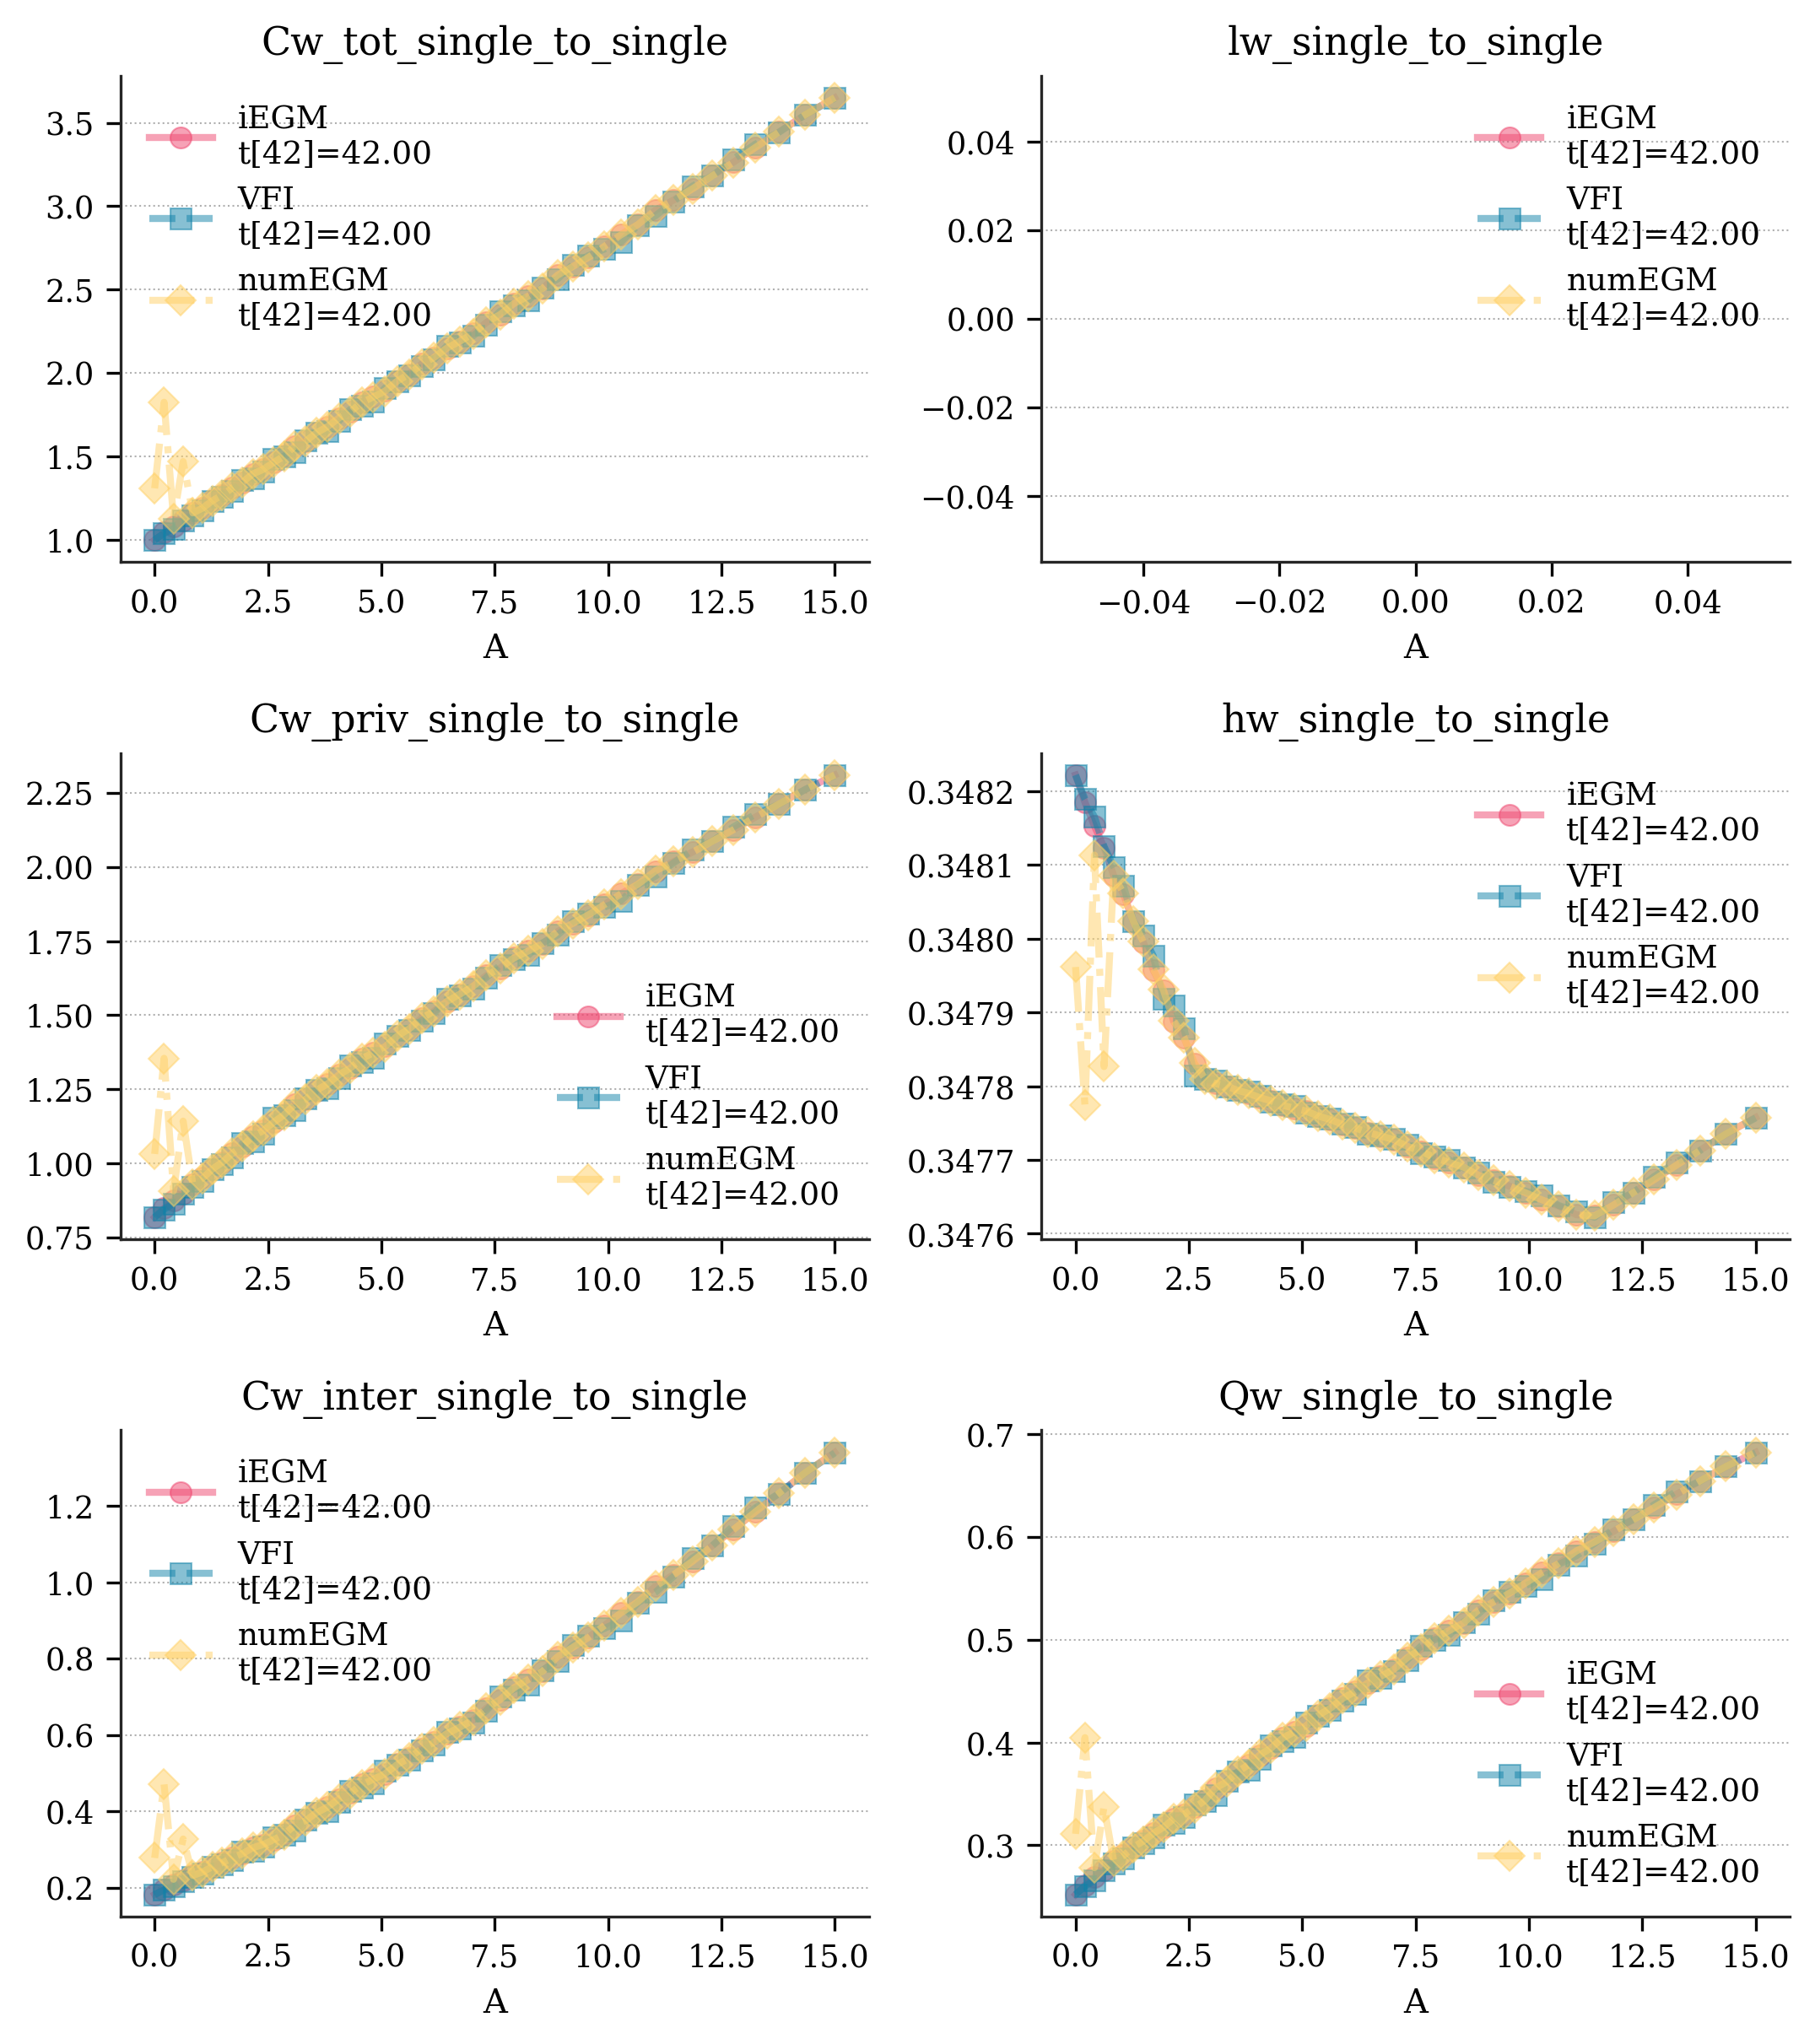

In [7]:
fig, ax = fm.create_figure(3,2,6)
mp_EGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_VFI.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_numEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
fm.save_figure(filename="test")

Saved full figure to output\test.pdf
Saved subplot to output\test_subplot_1.pdf
Saved subplot to output\test_subplot_2.pdf
Saved subplot to output\test_subplot_3.pdf
Saved subplot to output\test_subplot_4.pdf
Saved subplot to output\test_subplot_5.pdf
Saved subplot to output\test_subplot_6.pdf


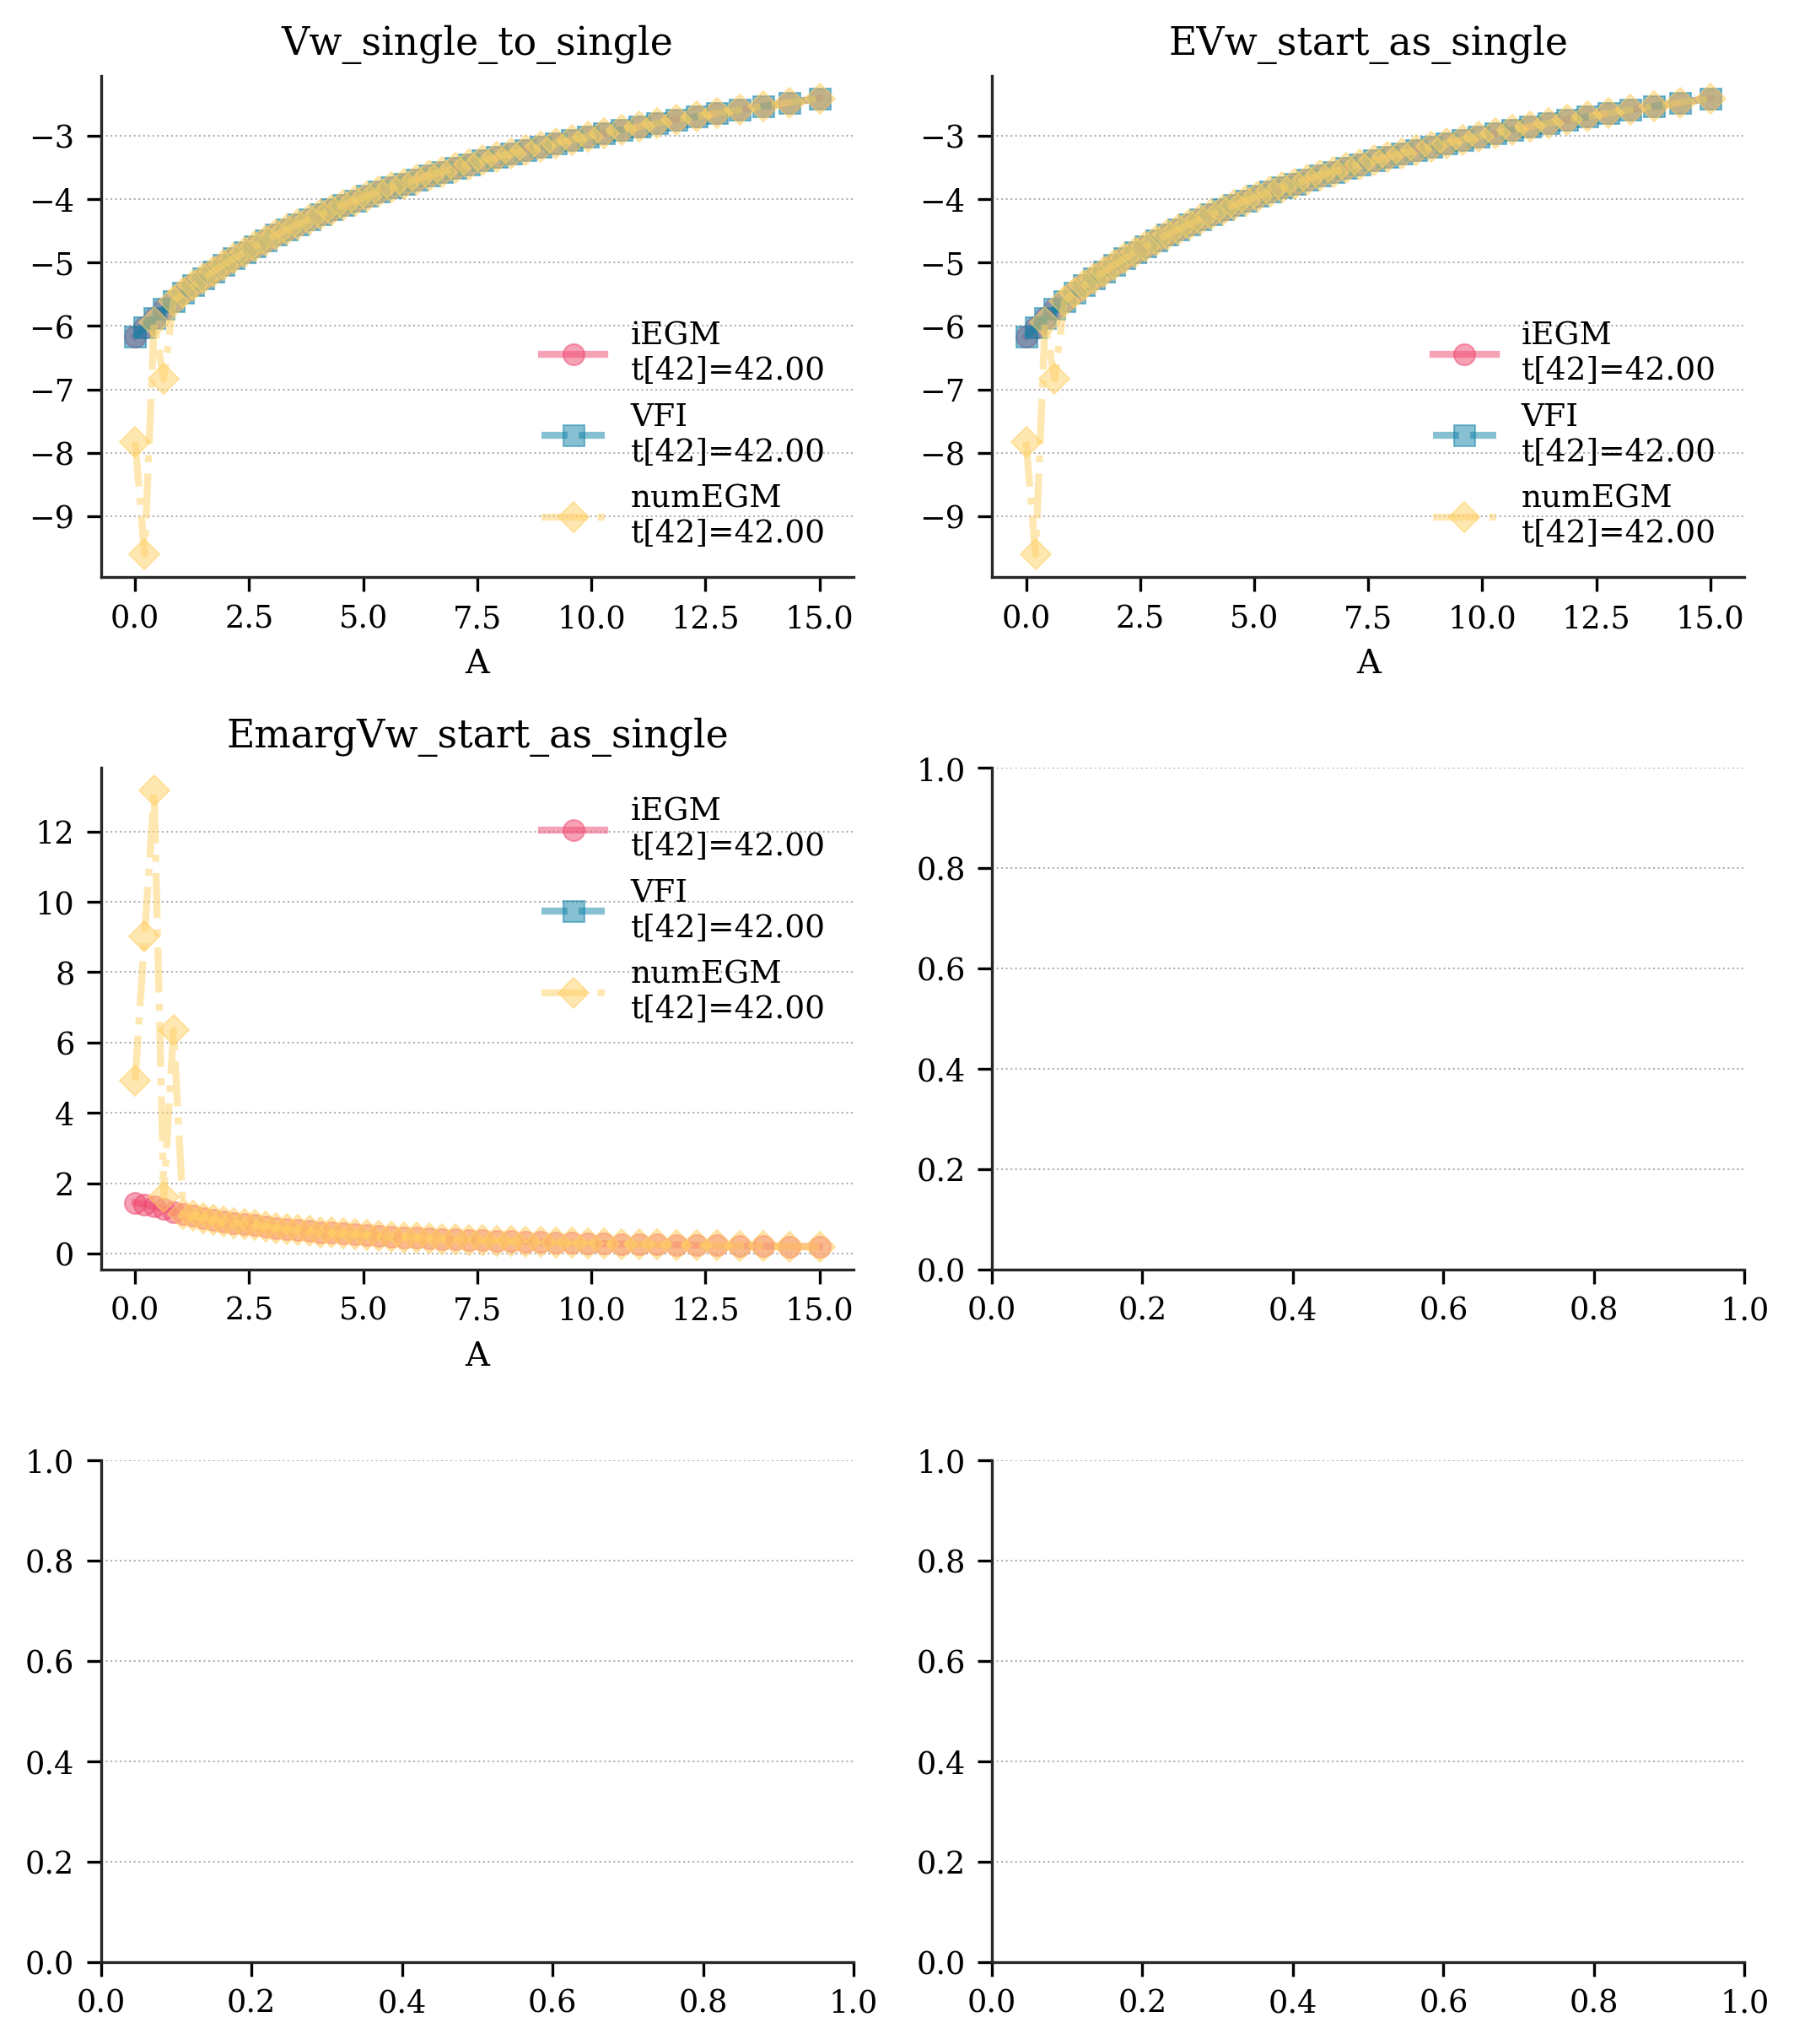

In [8]:
fig, ax = fm.create_figure(3,2,6)
mp_EGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
mp_VFI.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
mp_numEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
fm.save_figure(filename="test")

## Couples solution

Saved full figure to output\test.pdf
Saved subplot to output\test_subplot_1.pdf
Saved subplot to output\test_subplot_2.pdf
Saved subplot to output\test_subplot_3.pdf
Saved subplot to output\test_subplot_4.pdf
Saved subplot to output\test_subplot_5.pdf
Saved subplot to output\test_subplot_6.pdf


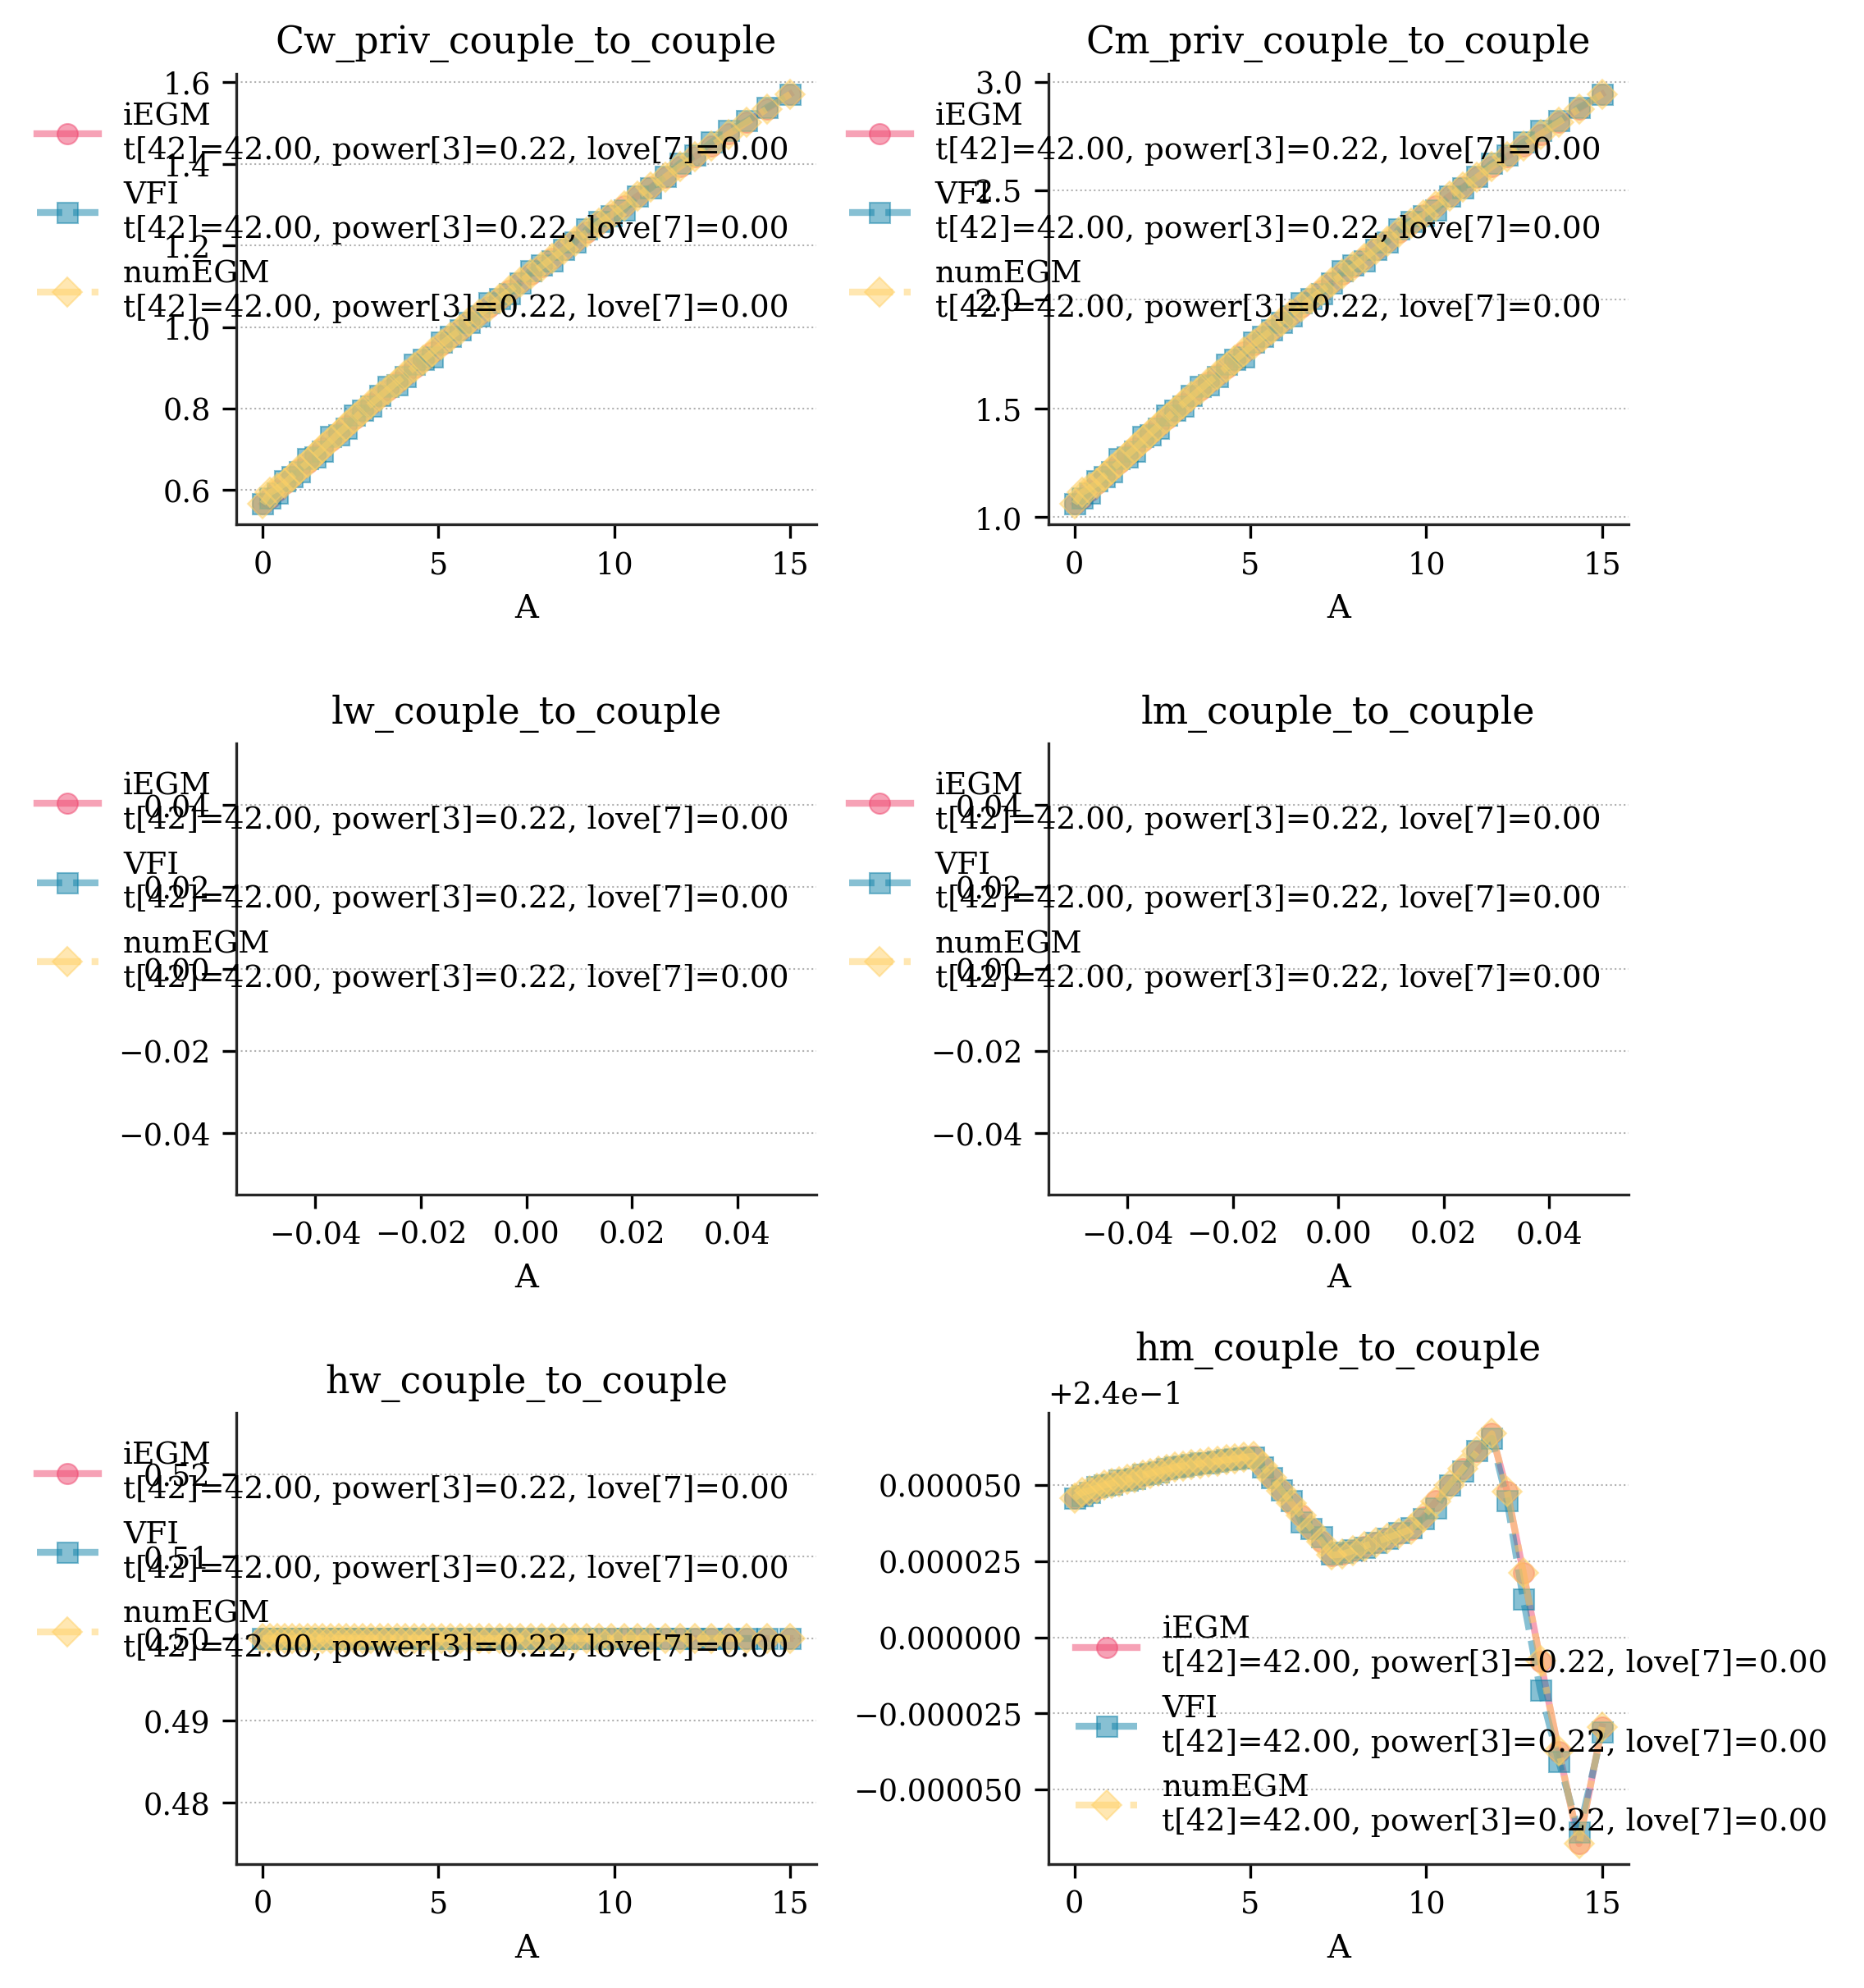

In [9]:
fig, ax = fm.create_figure(3,2,6)
mp_EGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_VFI.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_numEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
fm.save_figure(filename="test")

Saved full figure to output\test.pdf
Saved subplot to output\test_subplot_1.pdf
Saved subplot to output\test_subplot_2.pdf
Saved subplot to output\test_subplot_3.pdf


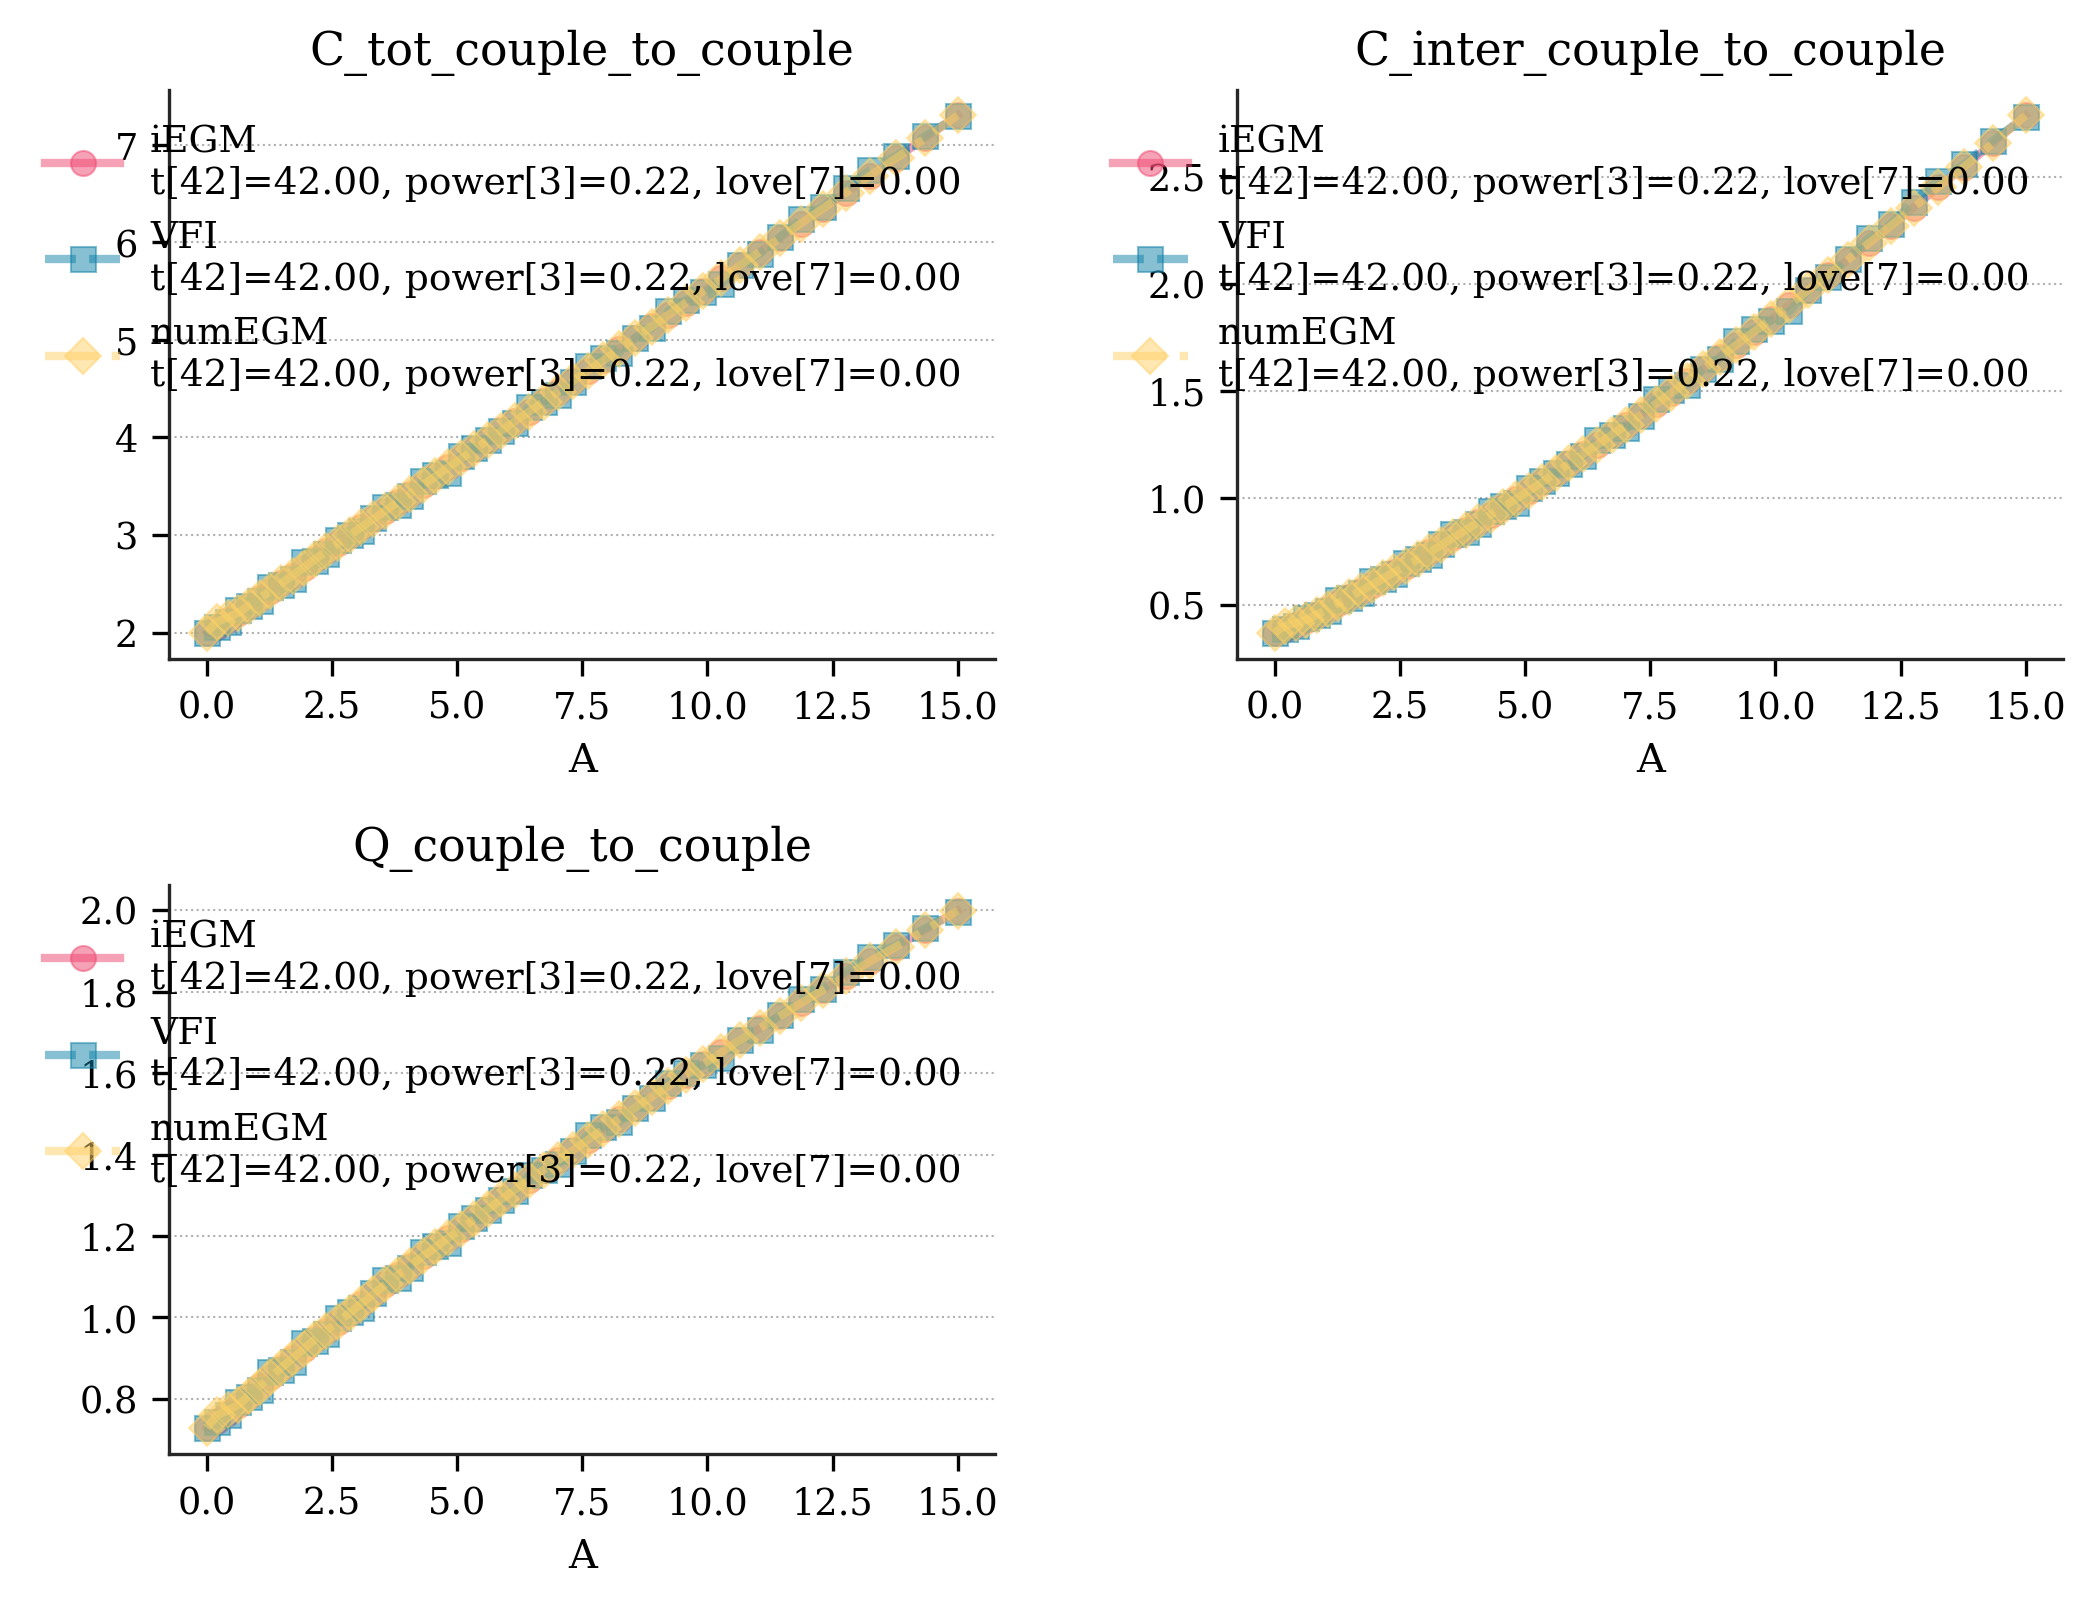

In [10]:
fig, ax = fm.create_figure(2,2,3)
mp_EGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_VFI.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
mp_numEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
fm.save_figure(filename="test")


## Simulation

Saved full figure to output\test.pdf
Saved subplot to output\test_subplot_1.pdf
Saved subplot to output\test_subplot_2.pdf
Saved subplot to output\test_subplot_3.pdf
Saved subplot to output\test_subplot_4.pdf


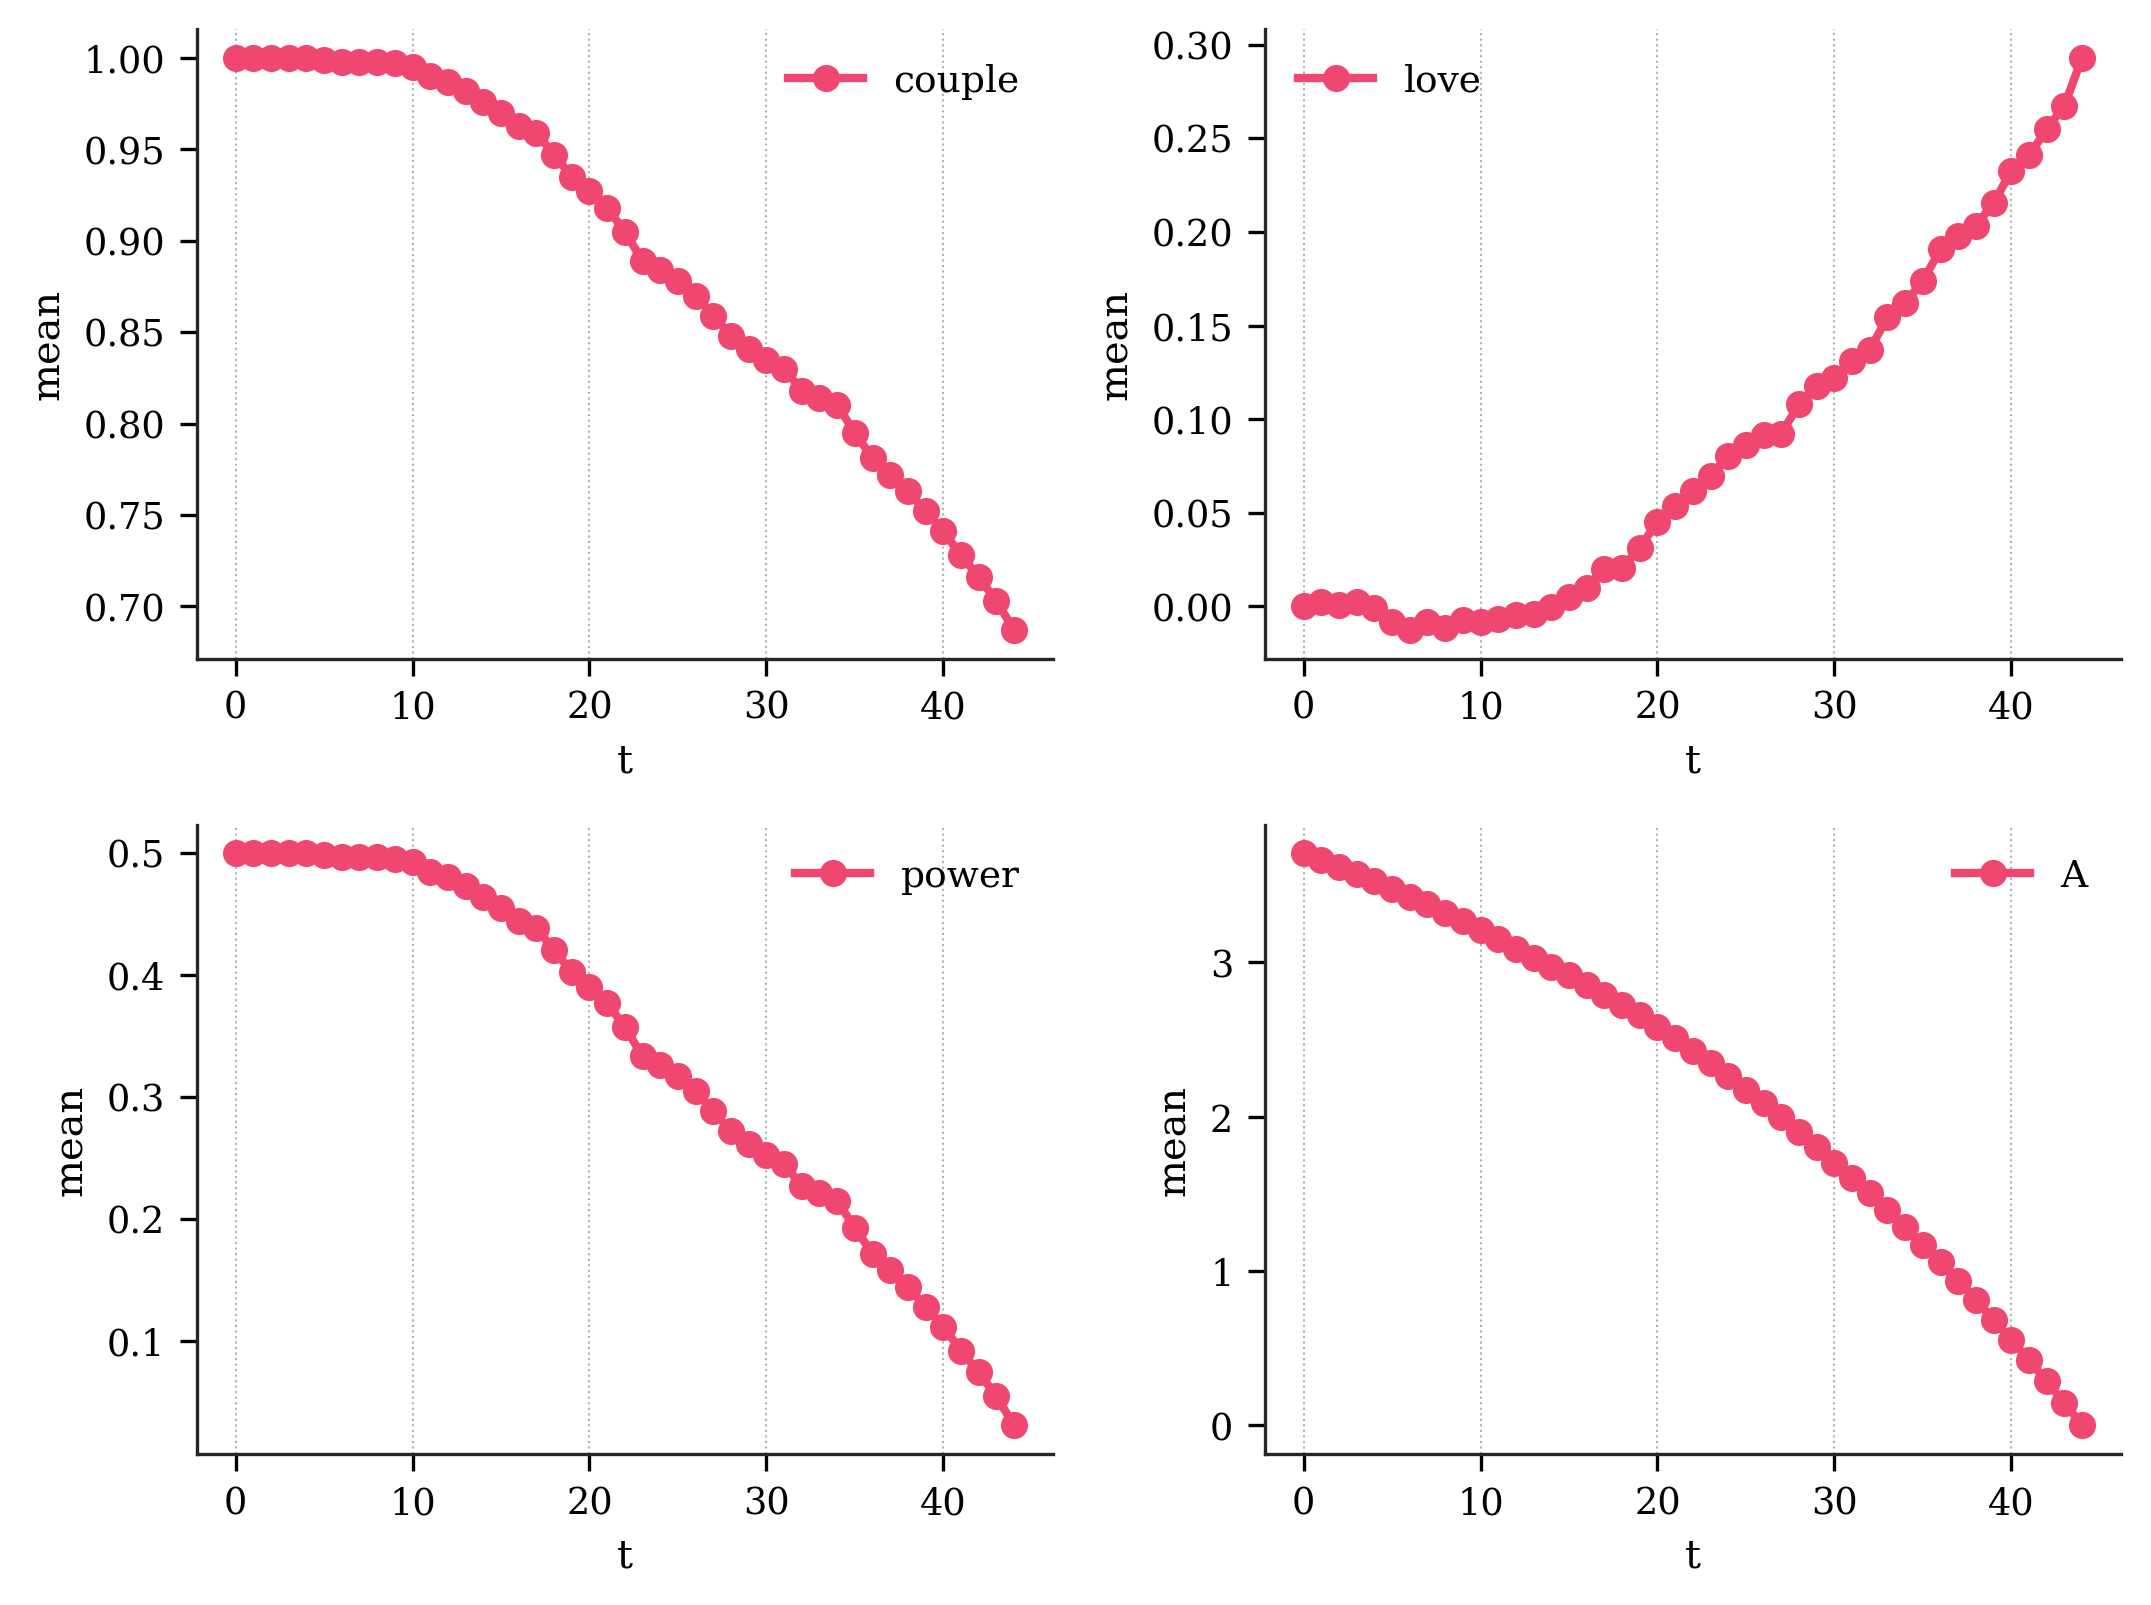

In [11]:
fig, ax = fm.create_figure(2,2,4)

ax[0].plot(np.arange(model.par.simT), np.nanmean(model.sim.couple, axis=0), label='couple')
ax[1].plot(np.arange(model.par.simT), np.nanmean(model.sim.love, axis=0), label='love')
ax[2].plot(np.arange(model.par.simT), np.nanmean(model.sim.power, axis=0), label='power')
ax[3].plot(np.arange(model.par.simT), np.nanmean(model.sim.A, axis=0), label='A')

## add legend
for a in ax:
    a.legend()
    a.set_xlabel('t')
    a.set_ylabel('mean')
    a.grid()
    
fm.save_figure(filename="test")


## Precomputation: Singles

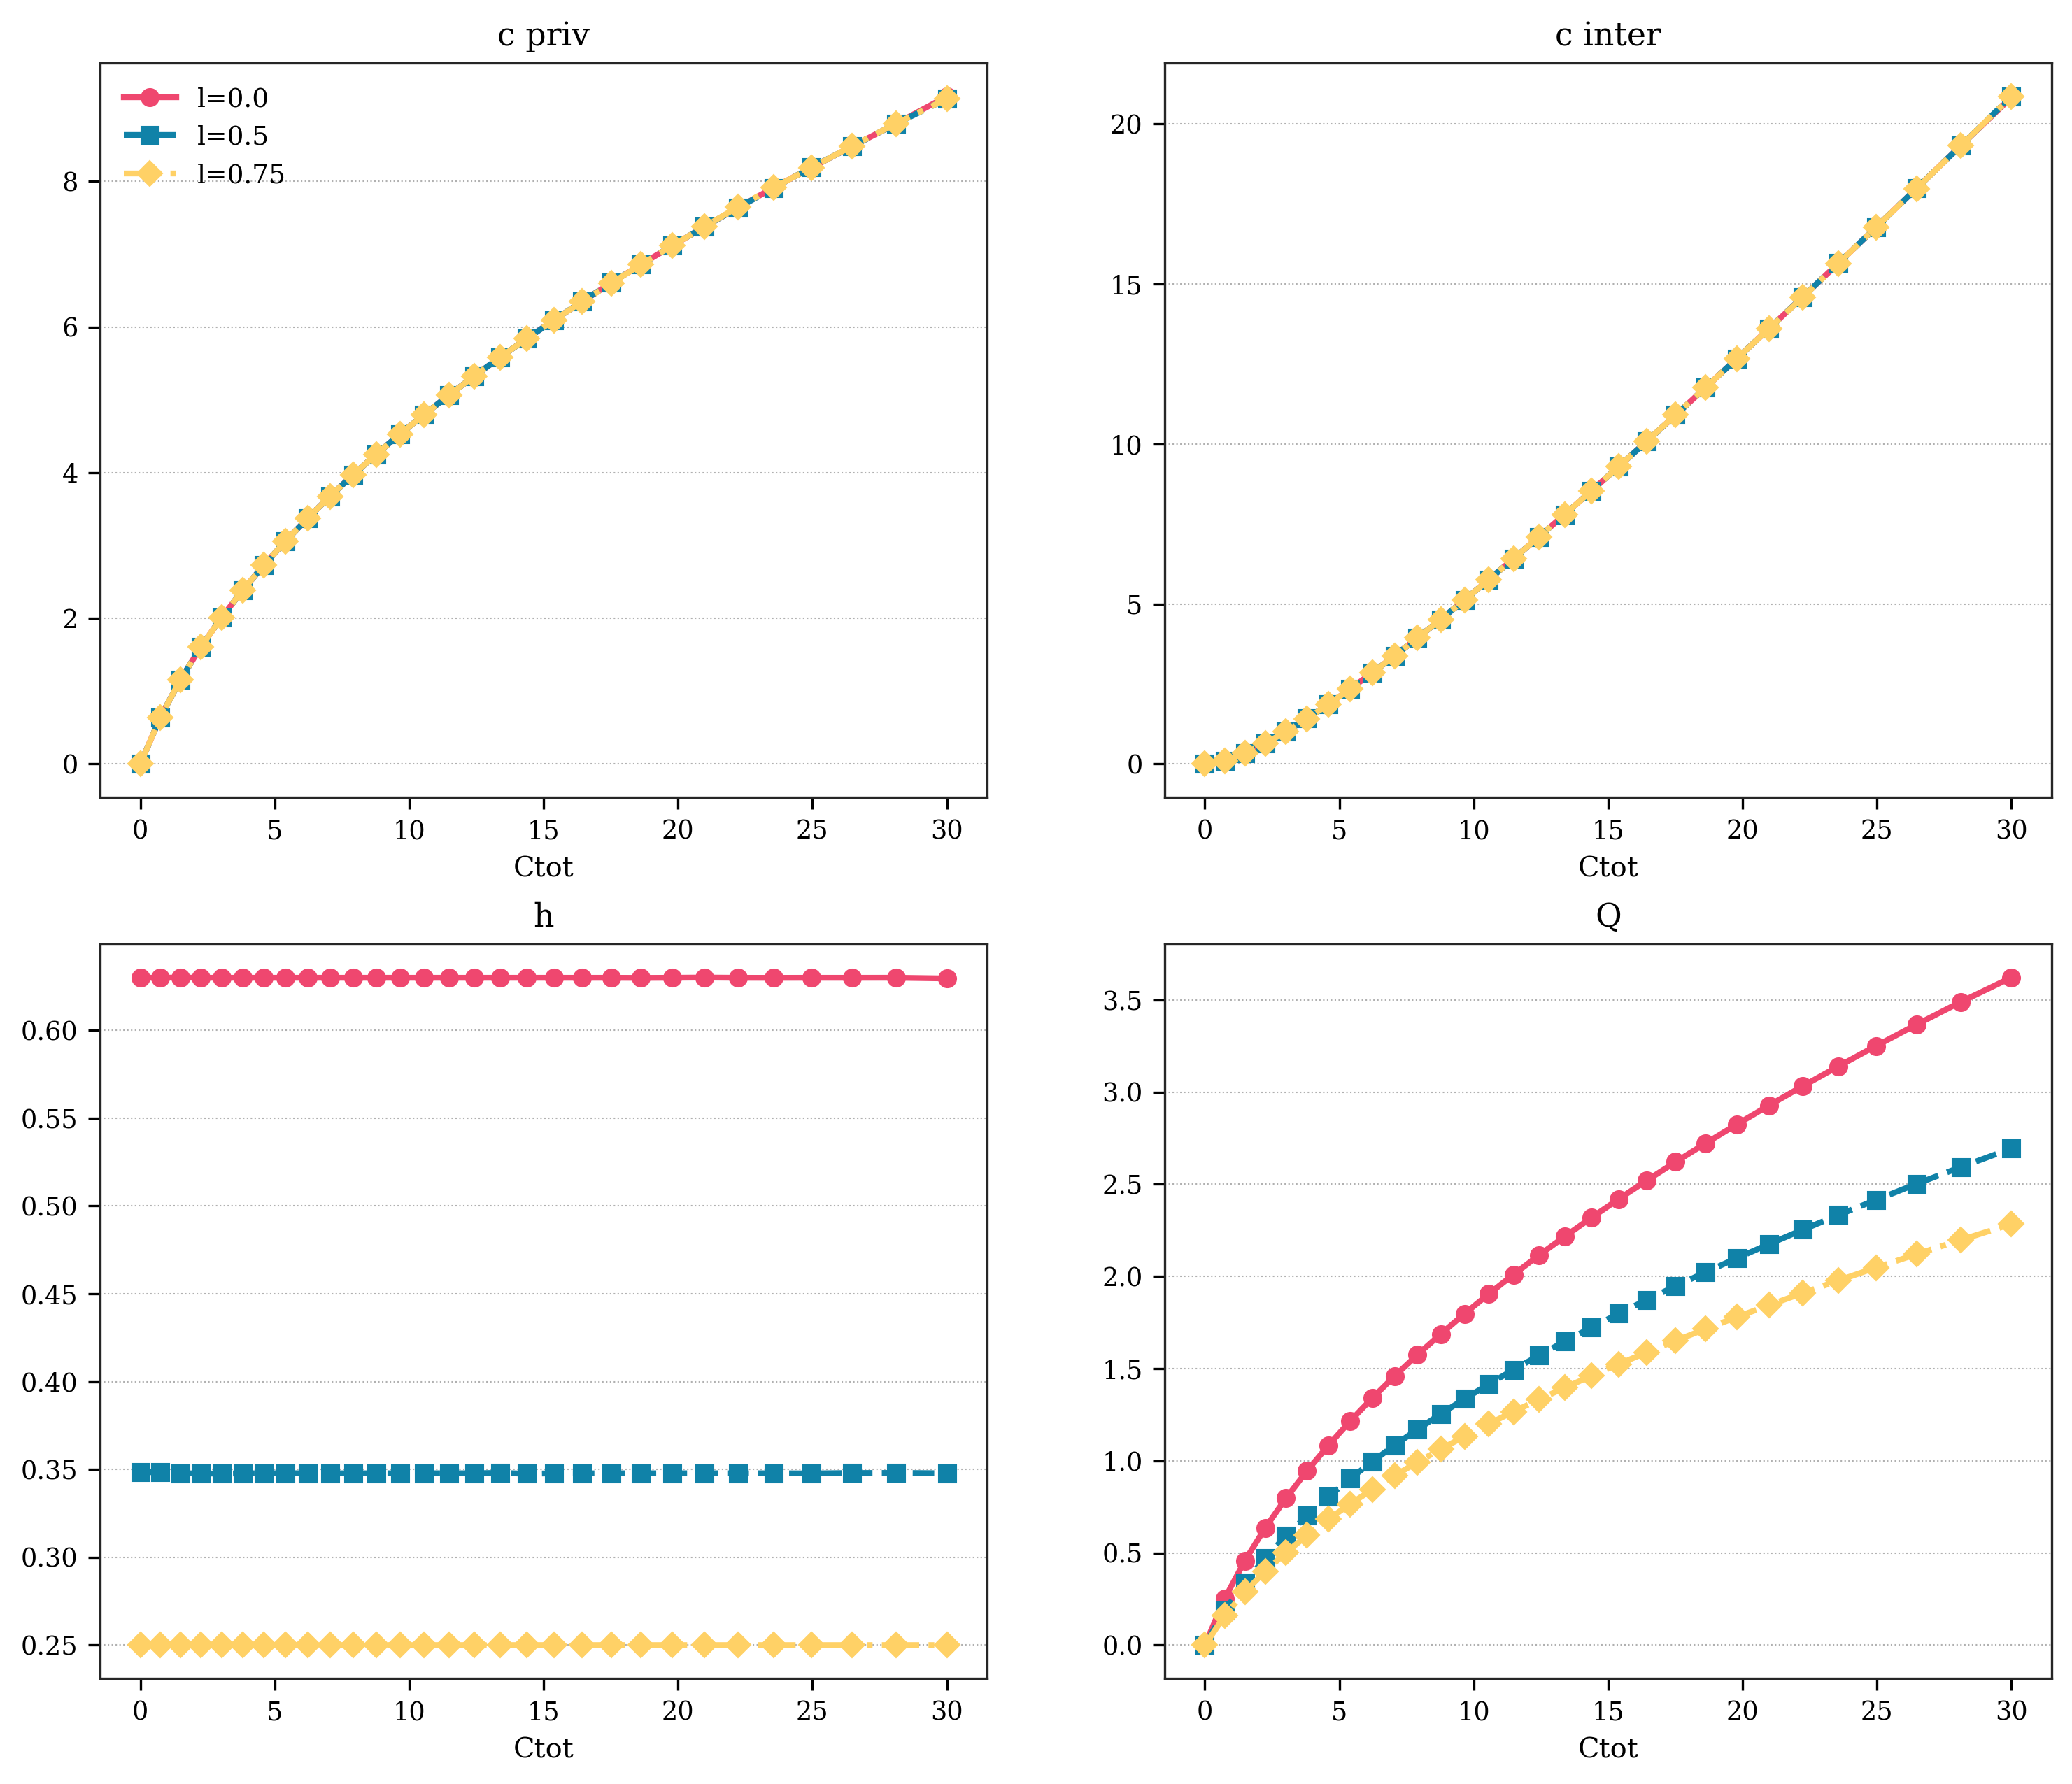

In [12]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

for i,l in enumerate(model.par.grid_l):
    ax[0,0].plot(model.par.grid_Ctot, model.sol.pre_Cw_priv_single[i,:], label=f'l={l}')
    ax[0,0].set_title('c priv')
    ax[0,0].set_xlabel('Ctot')
    ax[0,0].legend()

    ax[0,1].plot(model.par.grid_Ctot, model.sol.pre_Cw_inter_single[i,:], label=f'l={l}')
    ax[0,1].set_title('c inter')
    ax[0,1].set_xlabel('Ctot')

    ax[1,0].plot(model.par.grid_Ctot[:], model.sol.pre_hw_single[i,:], label=f'l={l}')
    ax[1,0].set_title('h')
    ax[1,0].set_xlabel('Ctot')

    ax[1,1].plot(model.par.grid_Ctot, model.sol.pre_Qw_single[i,:], label=f'l={l}')
    ax[1,1].set_title('Q')
    ax[1,1].set_xlabel('Ctot')



AMO: h is constant in Ctot due to the Cobb Douglas production function giving cross elasticities of zero. with a more general production function, h depends on Ctot (I've checked this). This is also why marginal utility does not depend on labor supply, see below. 

Text(0.5, 1.0, 'Marginal utility, singles')

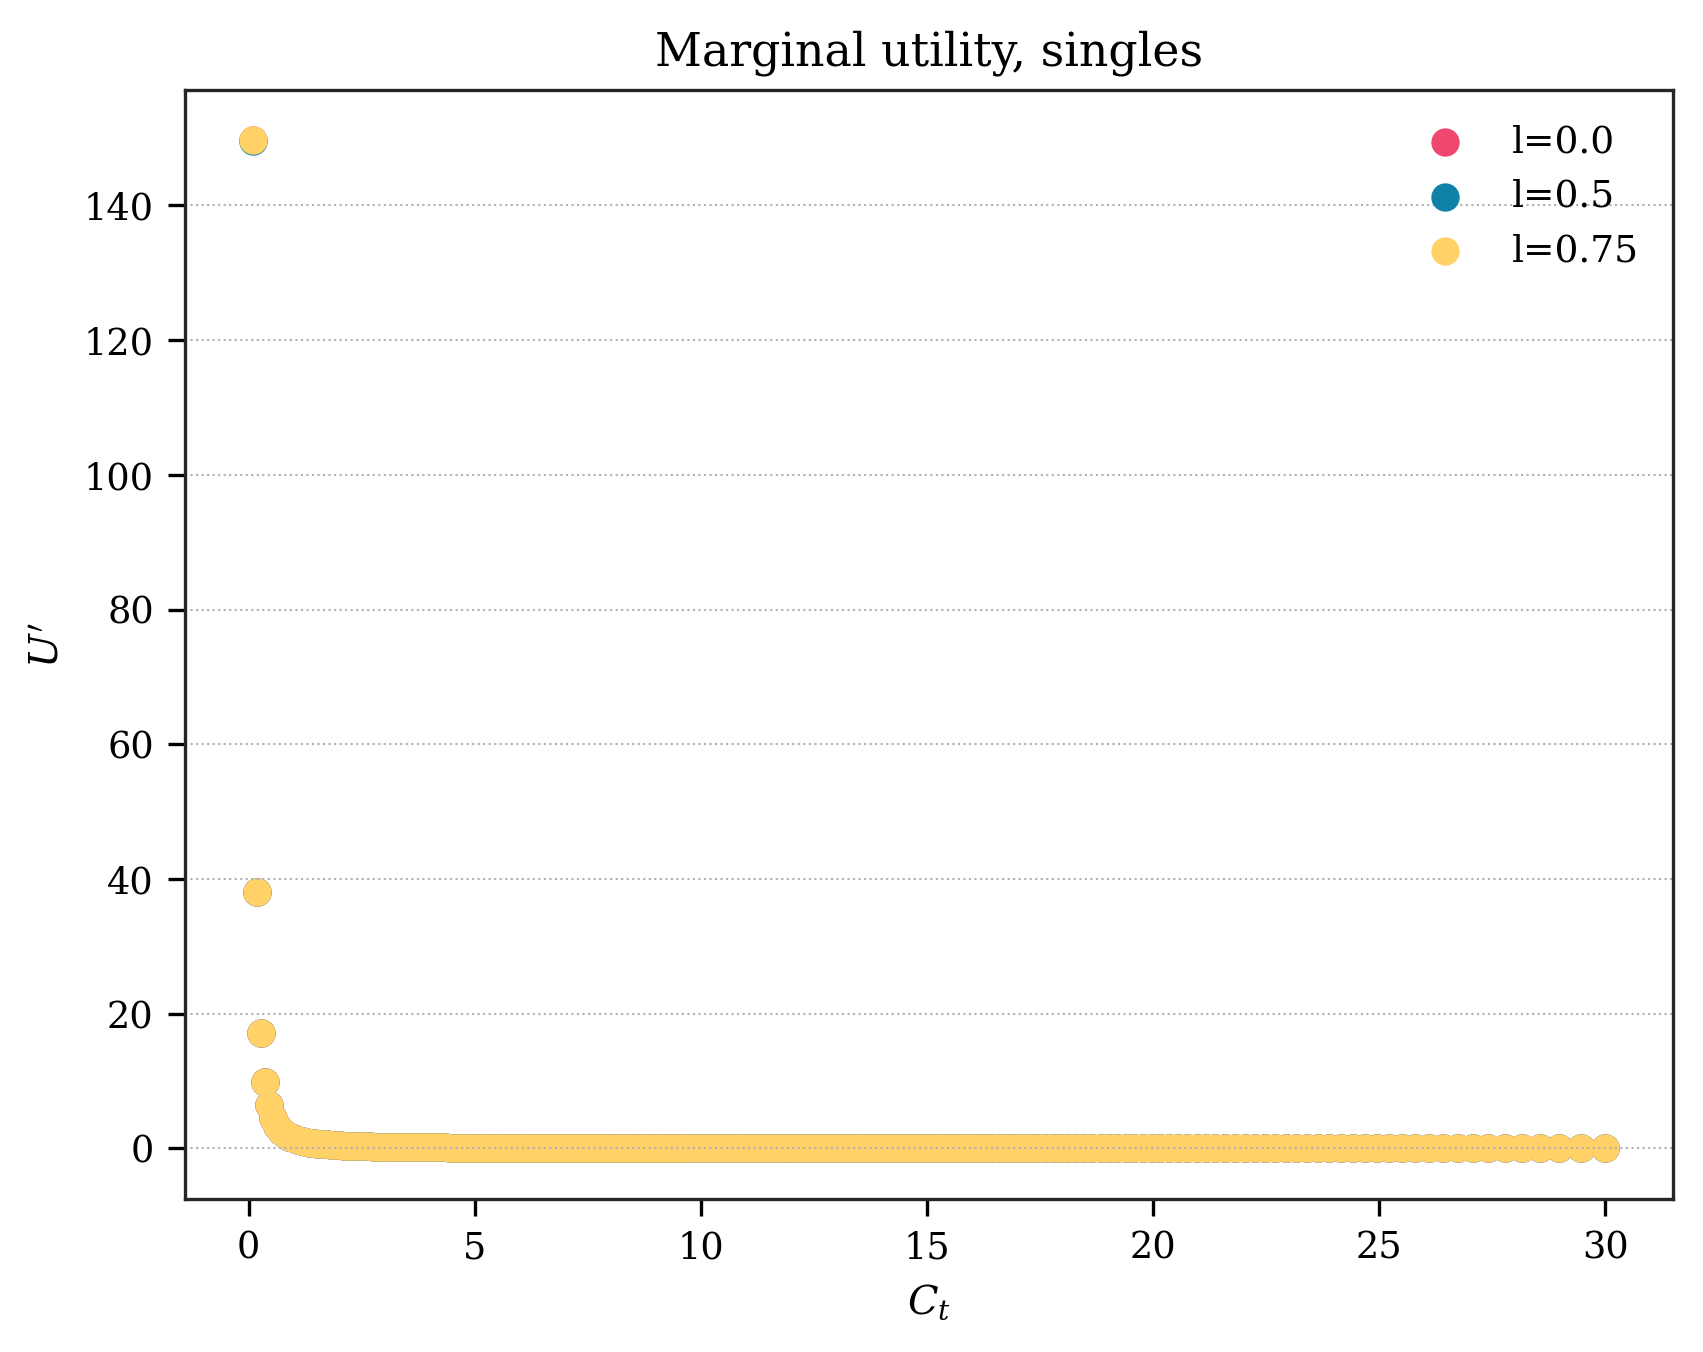

In [13]:
for il in range(par.num_l):
    plt.scatter(par.grid_C_for_marg_u[1:], par.grid_marg_u_single_m[il, 1:], label=f'l={par.grid_l[il]}')
plt.legend()
plt.xlabel('$C_t$')
plt.ylabel('$U\'$')
plt.title("Marginal utility, singles")

## Precomputation: Couples

In [14]:
model.cpp.delink()
model.link_to_cpp(force_compile=do_compile, do_print=False)
model.solve()

par = model.par
sol = model.sol

terminal:

(base) e:\AHJ\projects\FastBargaining\FastBargaining\Application>cd /d "C:/Program Files/Microsoft Visual Studio/2022/Community/VC/Auxiliary/Build/" 

(base) C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Auxiliary\Build>call vcvarsall.bat x64 
**********************************************************************
** Visual Studio 2022 Developer Command Prompt v17.7.6
** Copyright (c) 2022 Microsoft Corporation
**********************************************************************
[vcvarsall.bat] Environment initialized for: 'x64'
solve.cpp
setup_omp.cpp
Generating Code...
Microsoft (R) Incremental Linker Version 14.37.32825.0
Copyright (C) Microsoft Corporation.  All rights reserved.

/out:solve.dll 
/dll 
/implib:solve.lib 
solve.obj 
setup_omp.obj 
cppfuncs/nlopt-2.4.2-dll64/libnlopt-0.lib 
LINK : fatal error LNK1104: cannot open file 'solve.dll'

Microsoft (R) C/C++ Optimizing Compiler Version 19.37.32825 for x64
Copyright (C) Microsoft Corporation.  All righ

RuntimeError: C++ files can not be compiled

In [ ]:
def plot_variable_l_by_l(varname, container, iPs, x_axis):
    fig, ax = plt.subplots(3,3, figsize=(15,15))
    variable = getattr(container, varname)

    for ilw,lw in enumerate(model.par.grid_l):
        for ilm, lm in enumerate(model.par.grid_l):
            for iP in iPs:
                ax[ilw, ilm].plot(x_axis, variable[ilw, ilm, :, iP], label=f'p={par.grid_power[iP] :5.2f}')
                ax[ilw, ilm].scatter(x_axis, variable[ilw, ilm, :, iP], s=10)


            ax[ilw, ilm].set_title(f'lw={lw}, lm={lm}')
            ax[ilw, ilm].set_xlabel('Ctot')
            ax[ilw, ilm].legend()


iPs = [1, 5, 9]

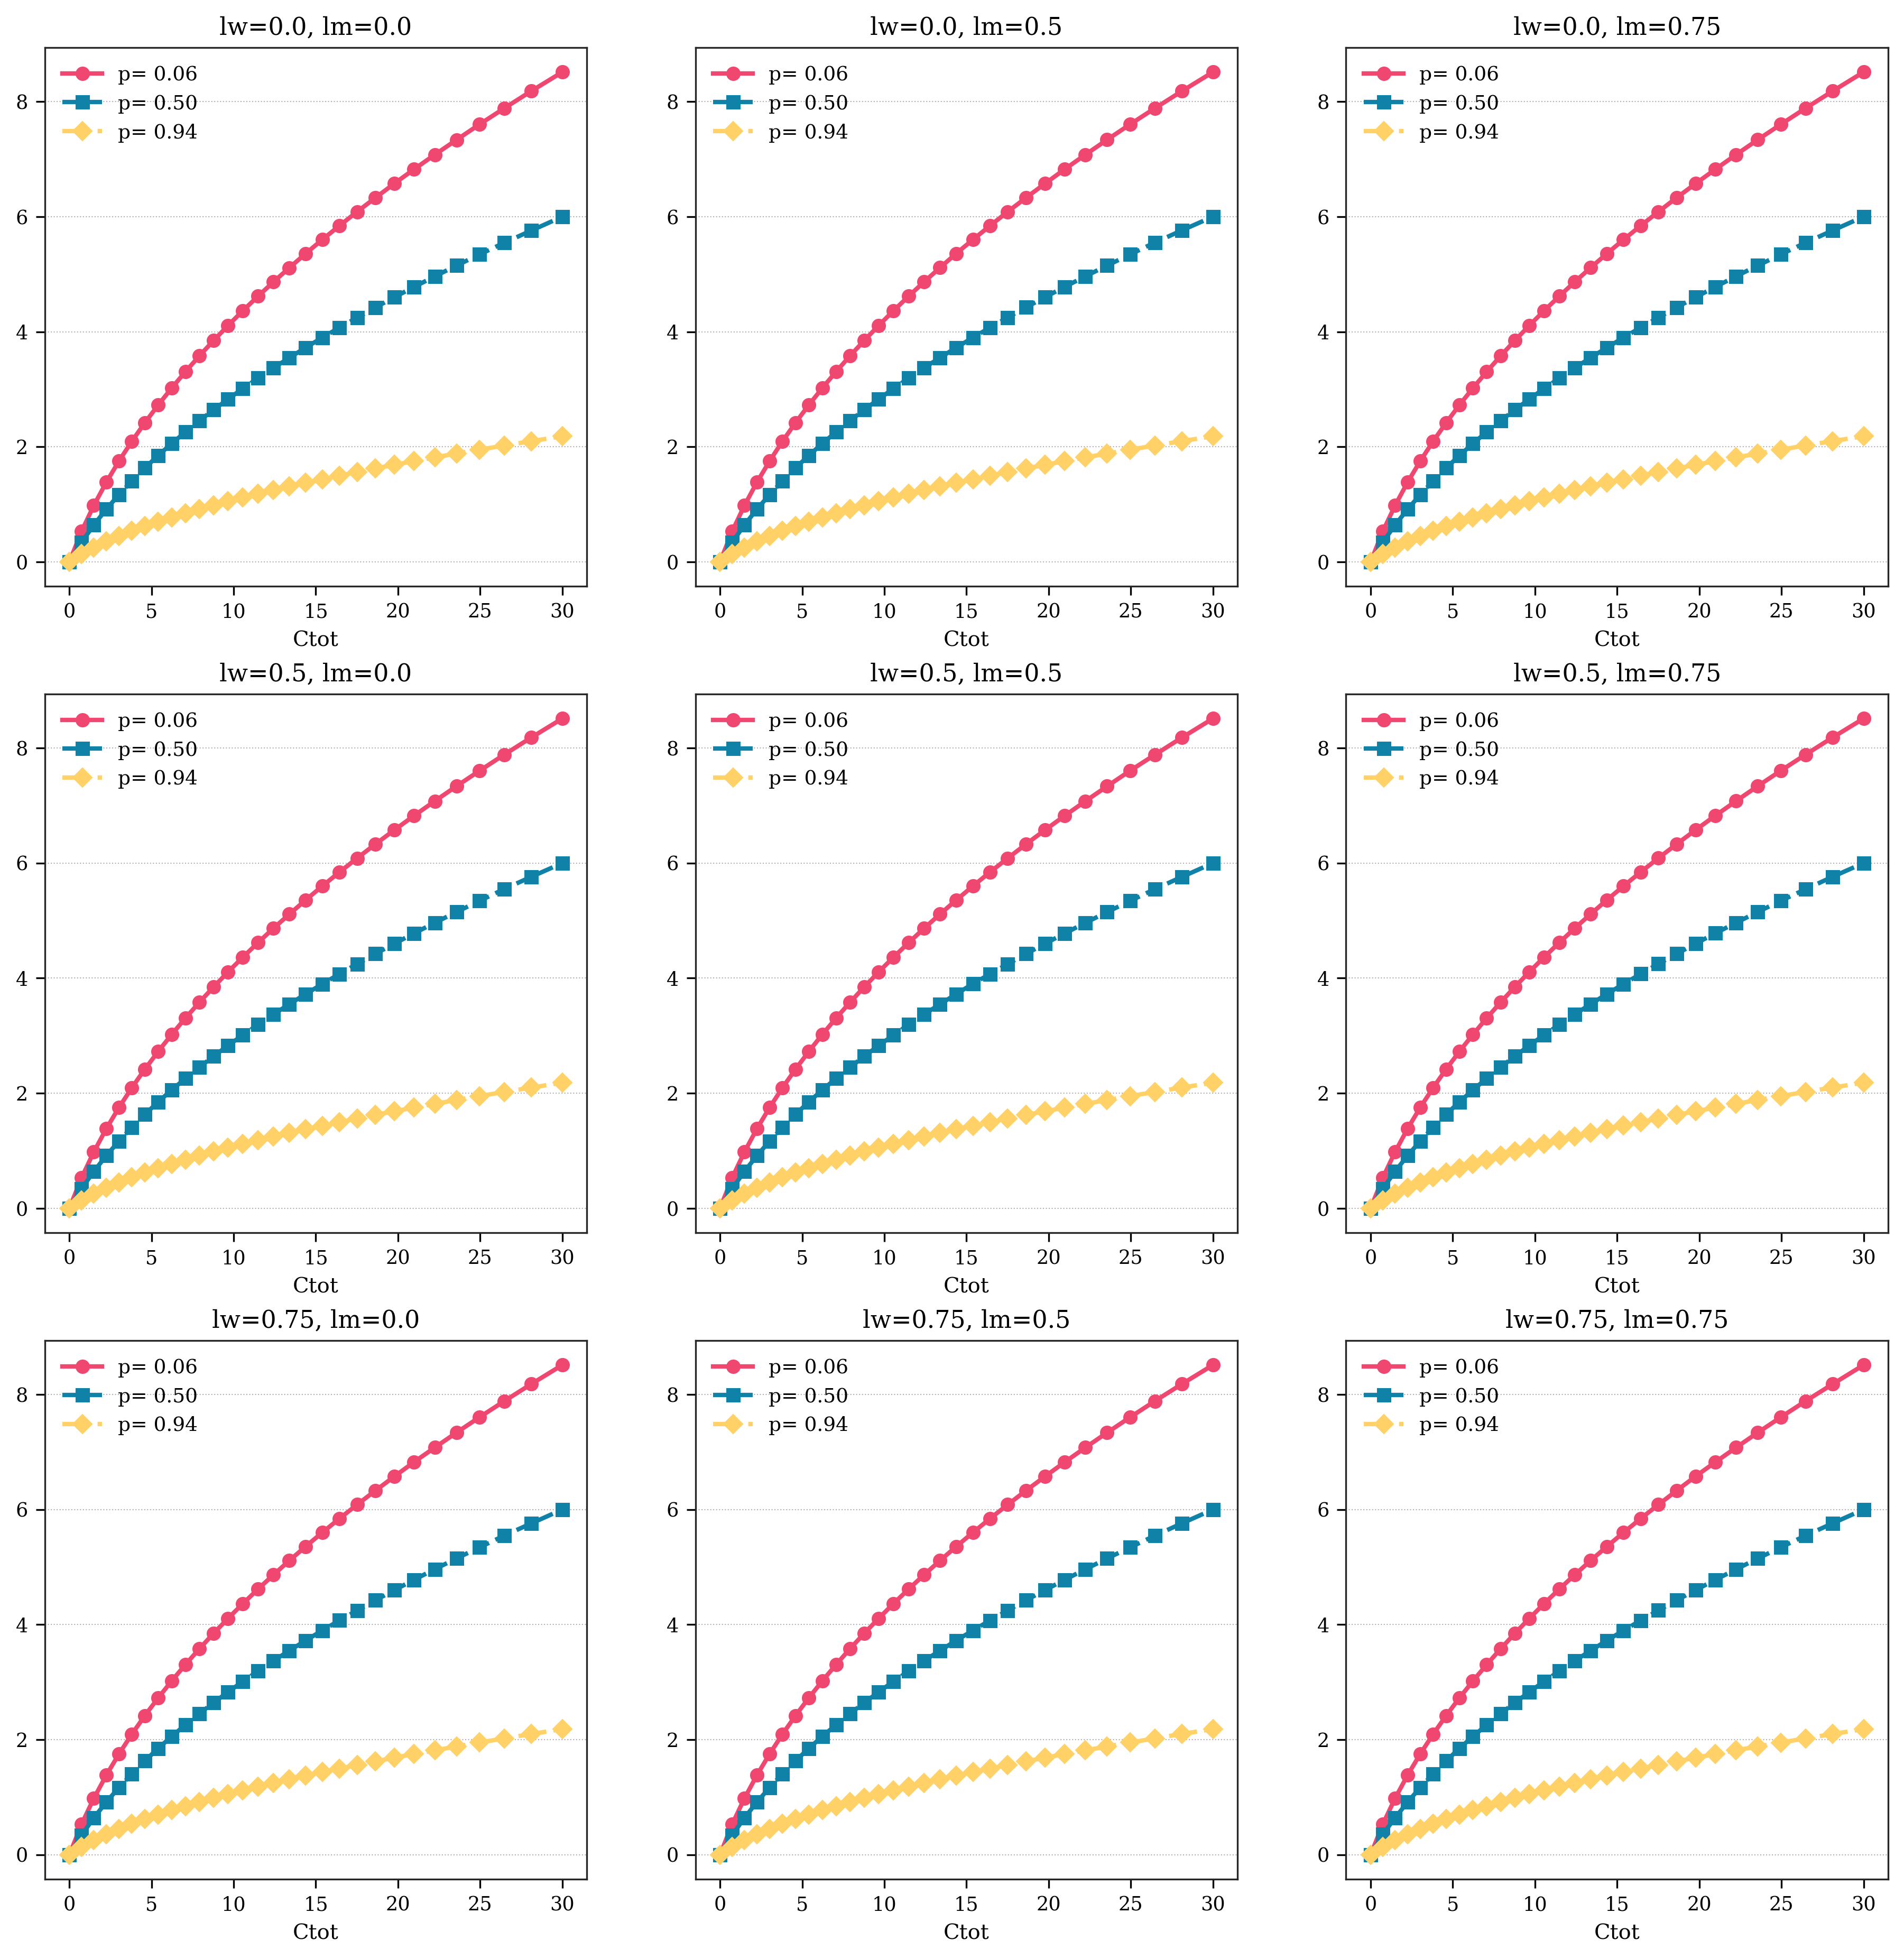

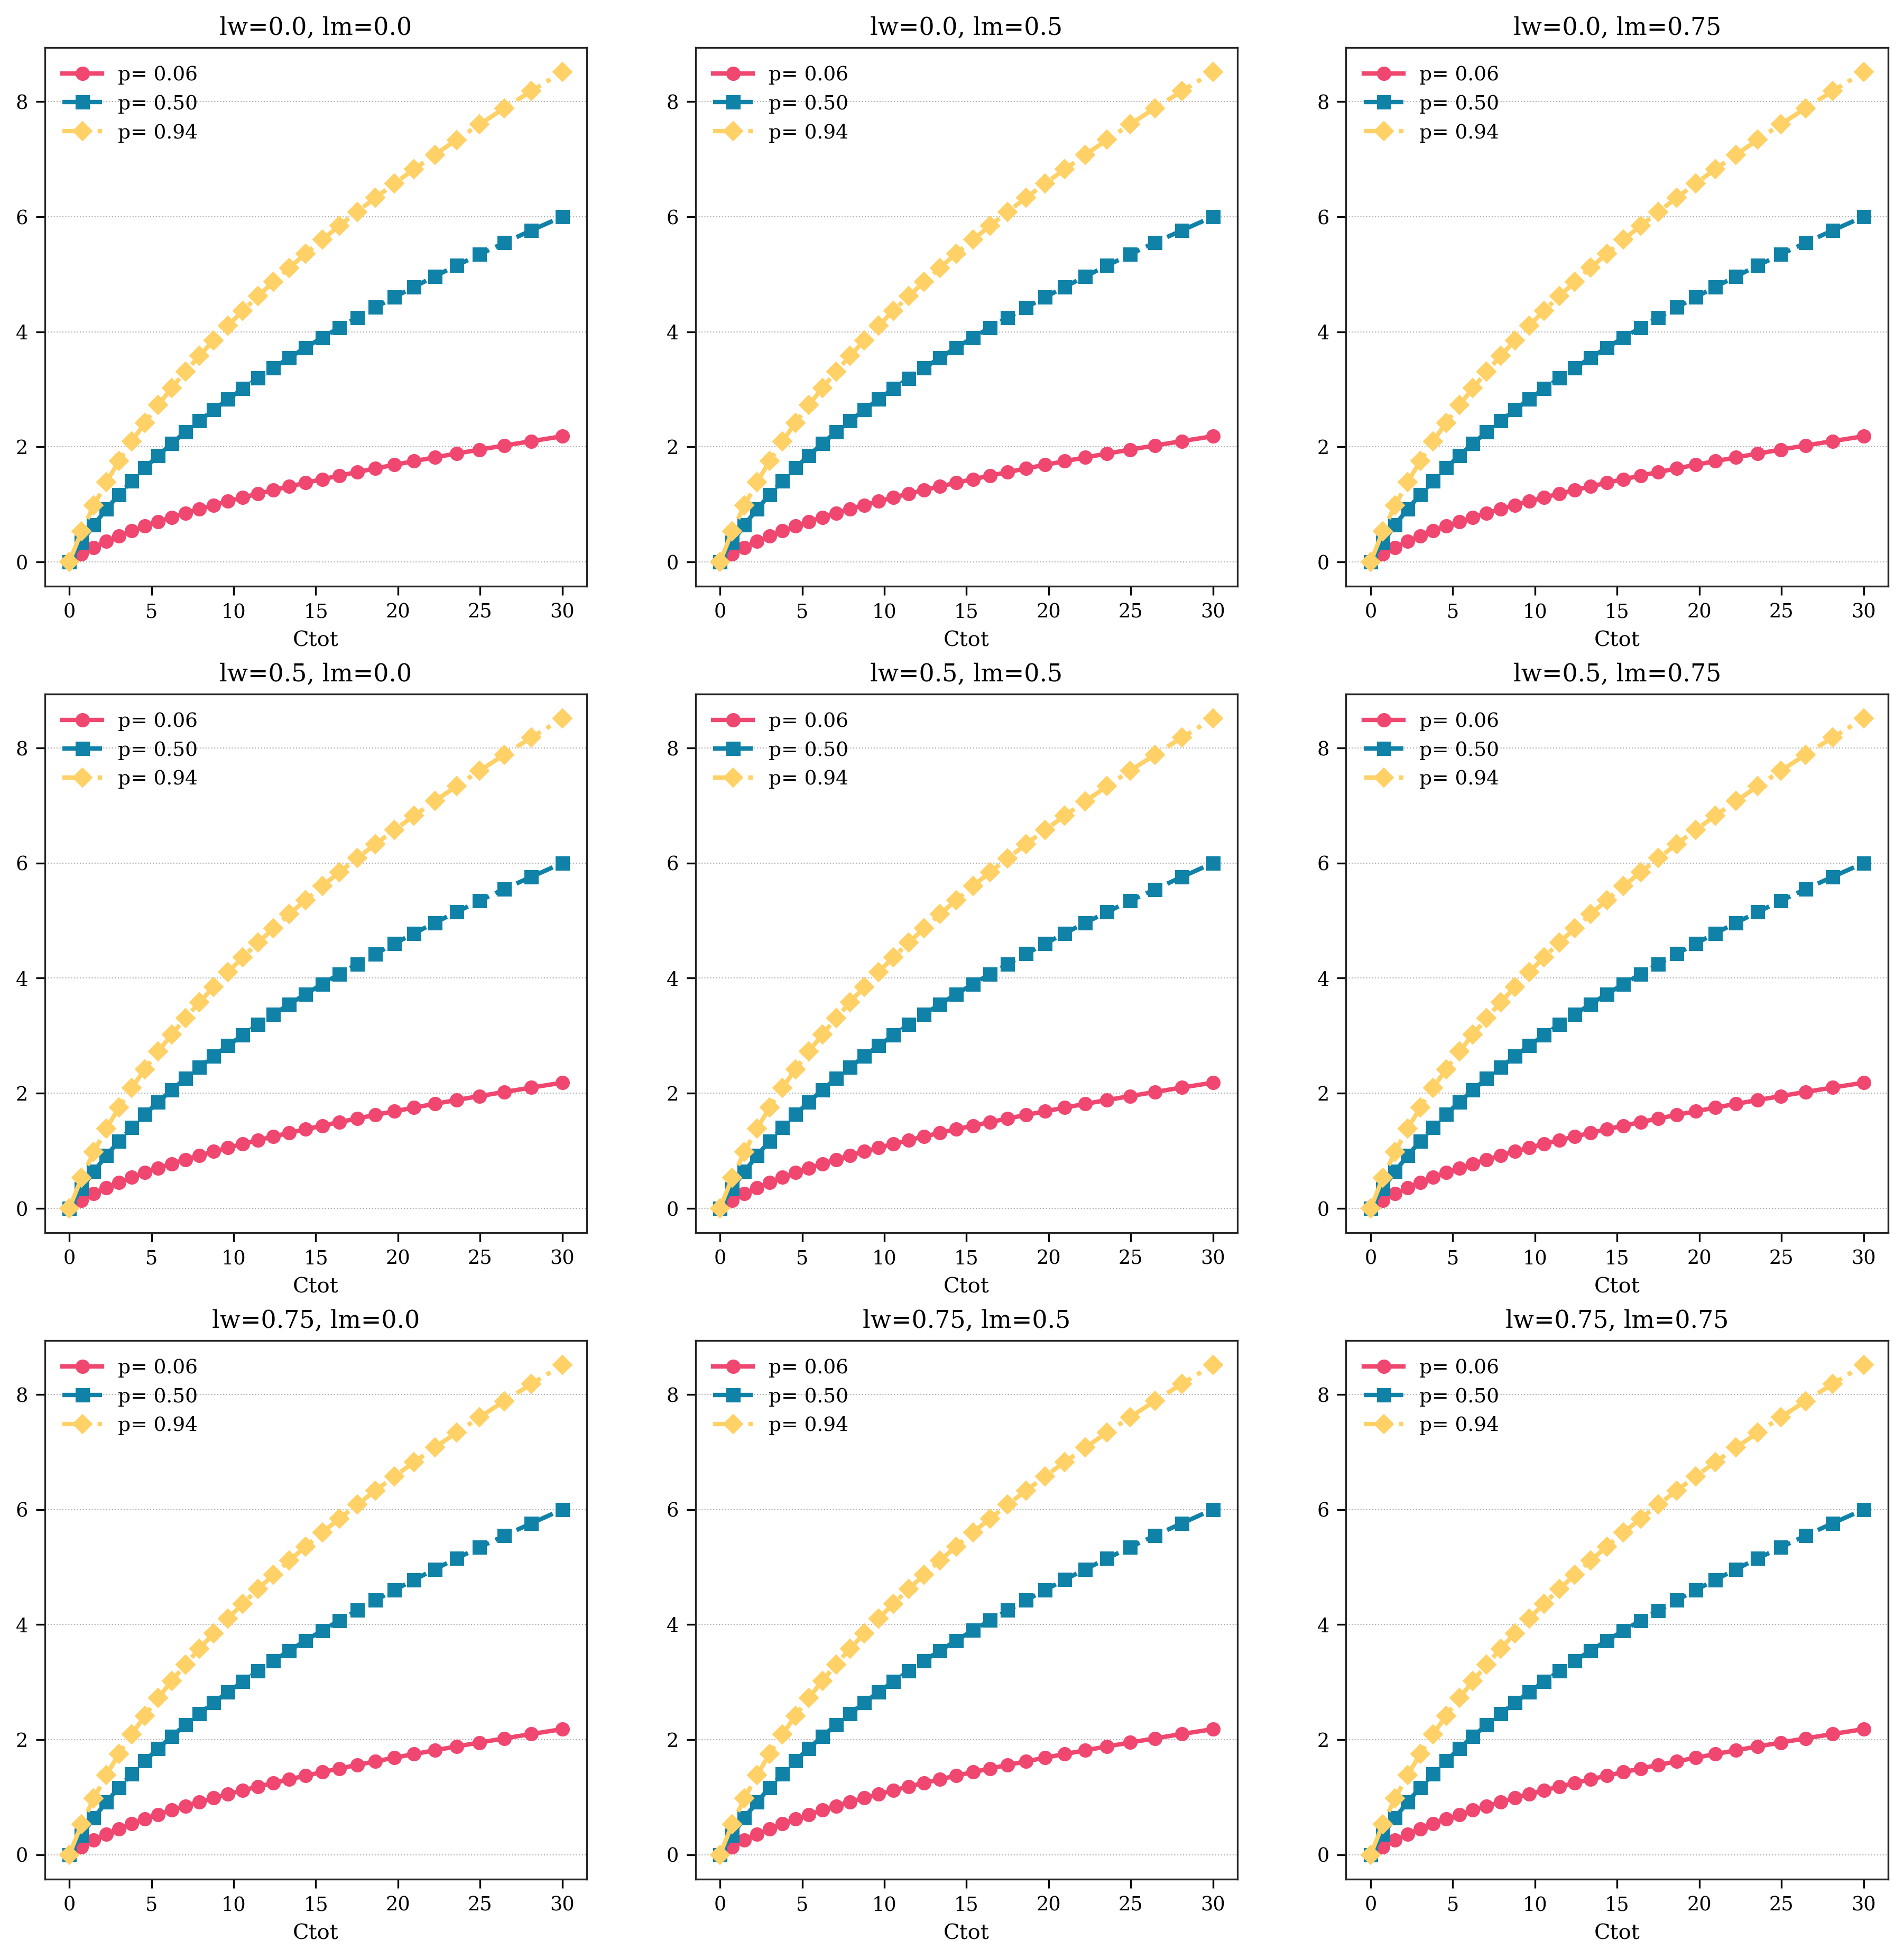

In [ ]:
plot_variable_l_by_l('pre_Cm_priv_couple', model.sol, iPs, par.grid_Ctot)
plot_variable_l_by_l('pre_Cw_priv_couple', model.sol, iPs, par.grid_Ctot)

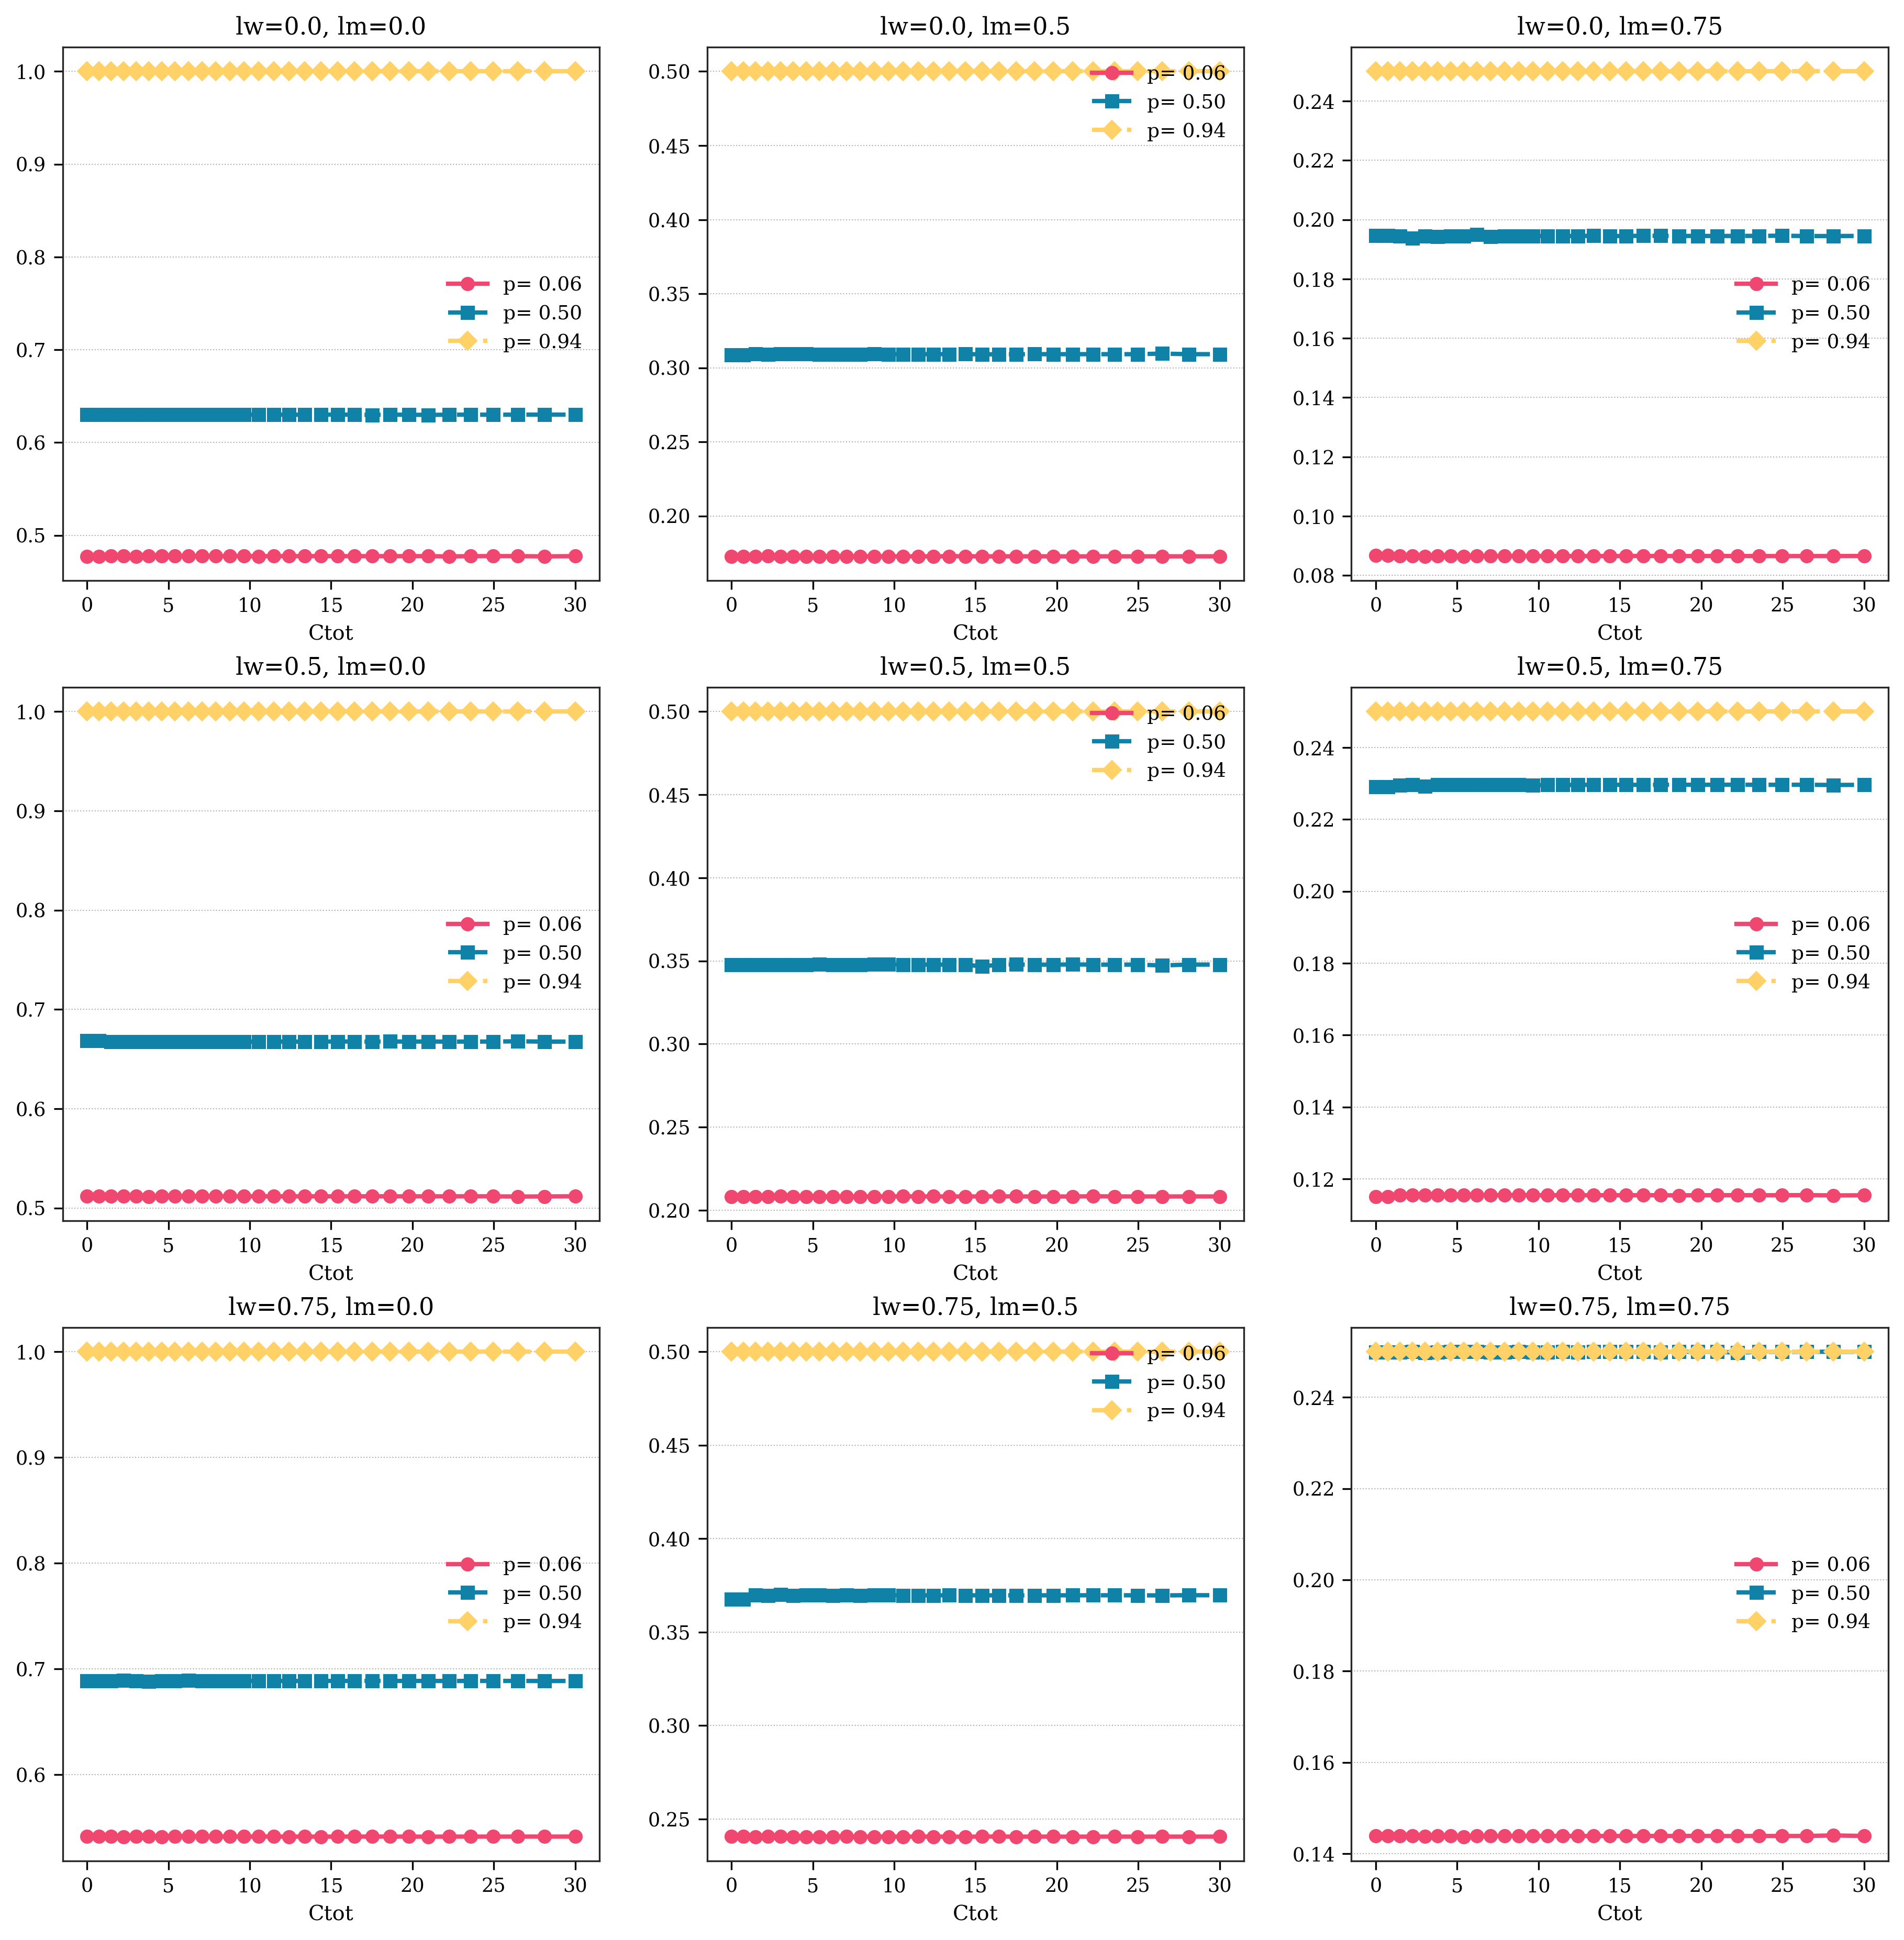

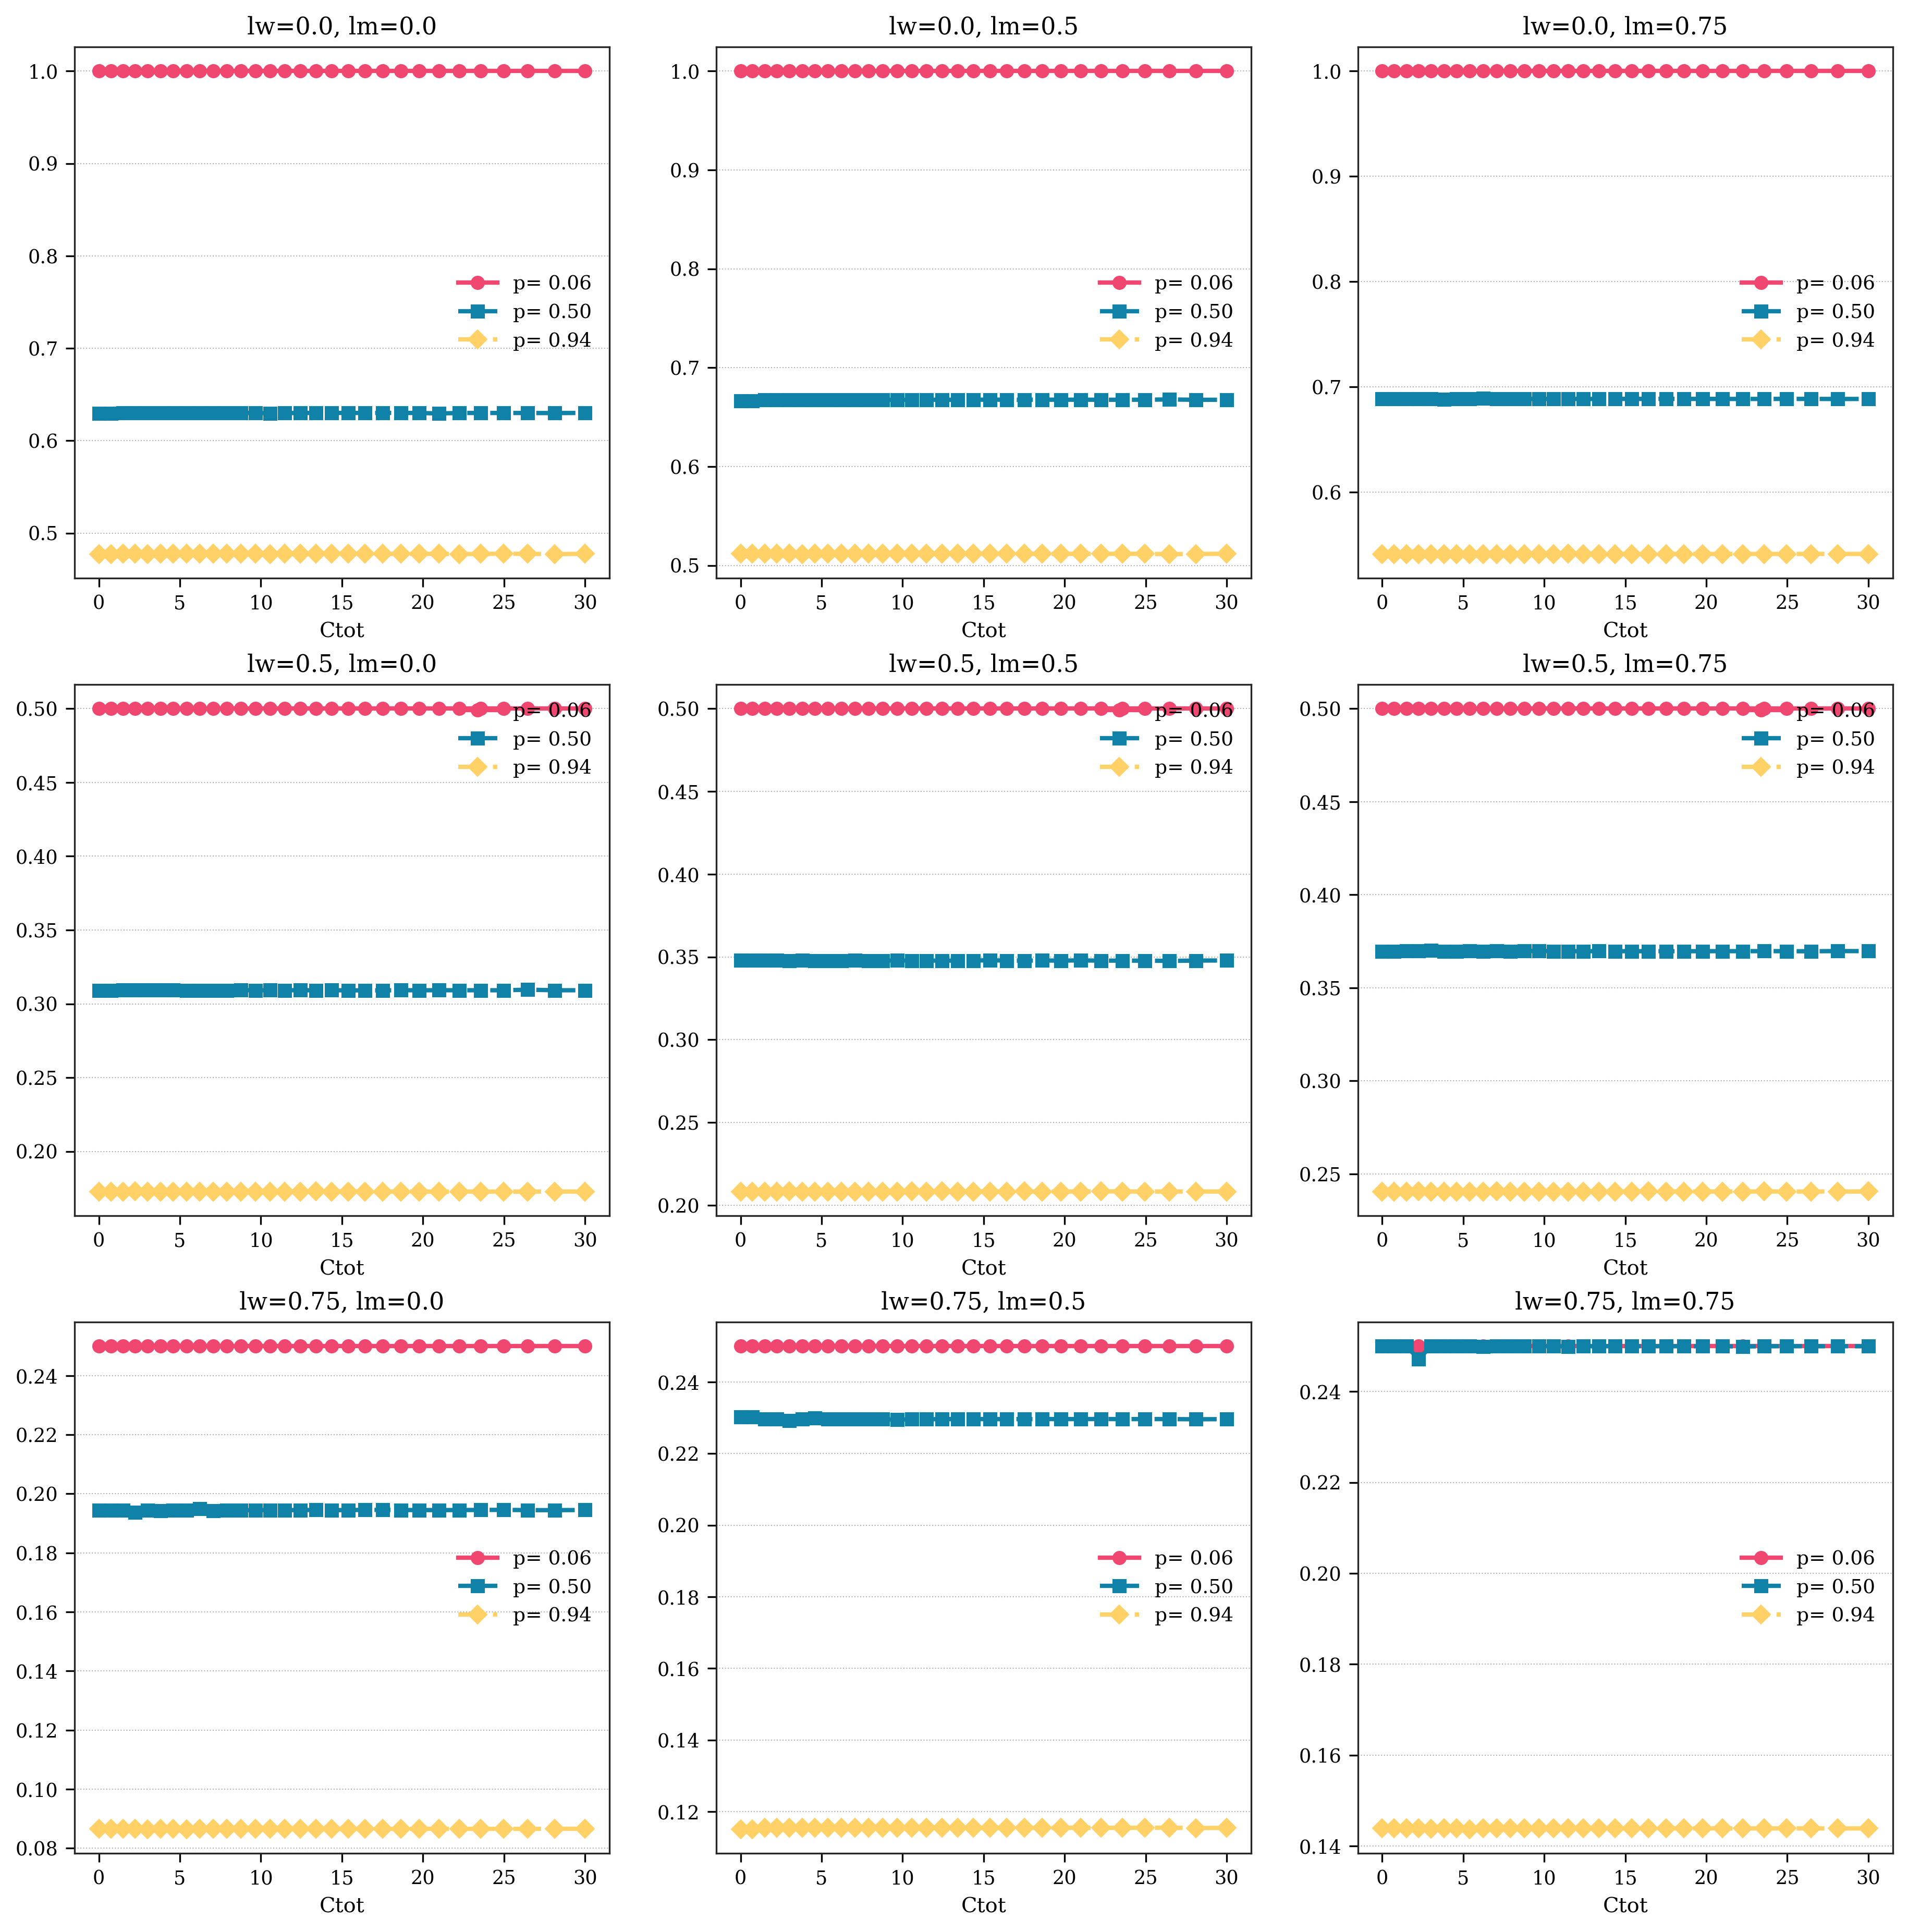

In [ ]:
plot_variable_l_by_l('pre_hm_couple', model.sol, iPs, par.grid_Ctot)
plot_variable_l_by_l('pre_hw_couple', model.sol, iPs, par.grid_Ctot)

ValueError: x and y must have same first dimension, but have shapes (200,) and (11,)

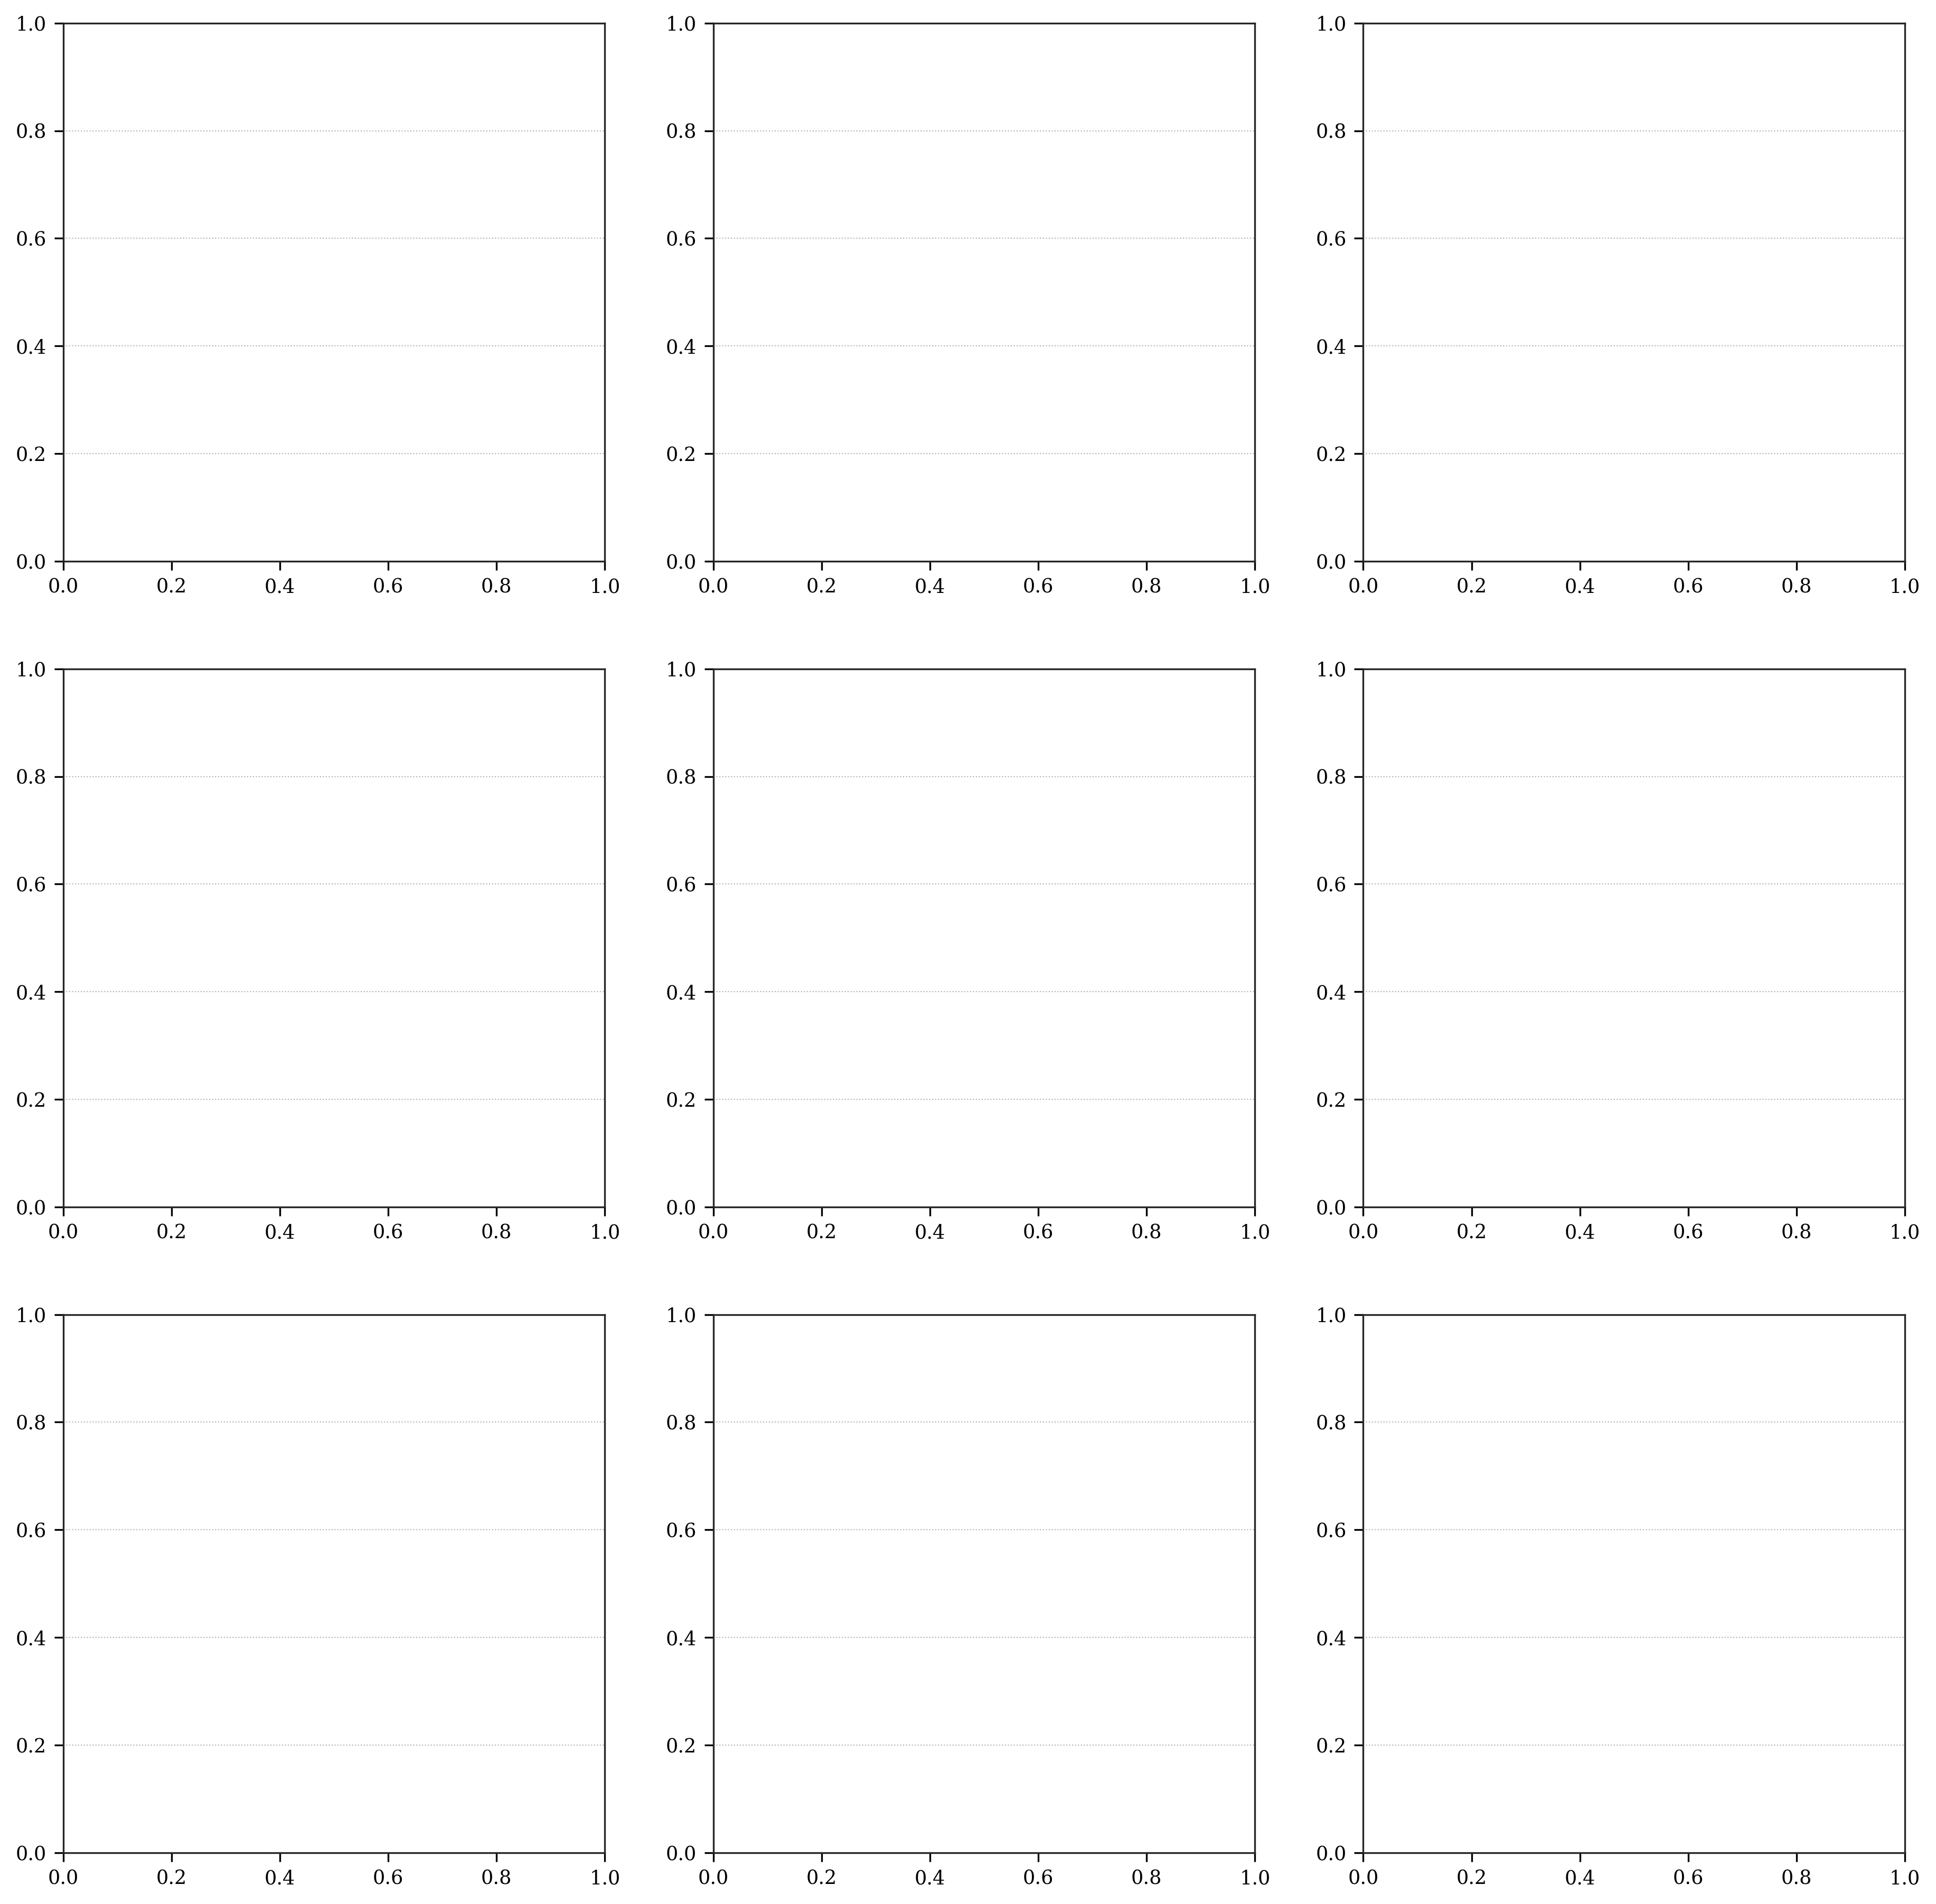

In [ ]:
plot_variable_l_by_l('grid_marg_u_couple', model.par, [1, 3, 6], model.par.grid_C_for_marg_u)